In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
import lightgbm as lgb
import mlflow 
import matplotlib.ticker as ticker
#mlflow.set_tracking_uri("./mlruns")
mlflow.set_tracking_uri("http://104.198.187.149:8000")
import geopandas as gpd
from shapely import wkt
from catboost import CatBoostRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer



import optuna
from sklearn.metrics import f1_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    balanced_accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    ConfusionMatrixDisplay
    
)
from dotenv import load_dotenv
import os

load_dotenv("./.env") 
CH_HOST = os.getenv('CH_HOST')
CH_PORT = os.getenv('CH_PORT') 
CH_USER = os.getenv('CH_USER')
CH_PASSWORD = os.getenv('CH_PASSWORD')

import clickhouse_connect

client = clickhouse_connect.get_client(host=CH_HOST, port=CH_PORT, user=CH_USER, password=CH_PASSWORD)

In [5]:
import importlib

packages = [
    "pandas",
    "scikit_learn",
    "seaborn",
    "xgboost",
    "optuna",
    "catboost",
    "numpy",
    "lightgbm",
    "mlflow",
    "google.cloud.storage",
    "geopandas",
    "shapely",
    "clickhouse_connect",
    "dotenv"
]

for pkg in packages:
    try:
        mod = importlib.import_module(pkg)
        version = getattr(mod, '__version__', 'No __version__ attribute')
        print(f"{pkg}: {version}")
    except ModuleNotFoundError:
        print(f"{pkg}: Not installed")


pandas: 2.2.3
scikit_learn: Not installed
seaborn: 0.13.2
xgboost: 3.0.2
optuna: 4.3.0
catboost: 1.2.8
numpy: 2.2.6
lightgbm: 4.6.0
mlflow: 2.22.0
google.cloud.storage: 3.1.0
geopandas: 1.1.0
shapely: 2.1.1
clickhouse_connect: <module 'clickhouse_connect.__version__' from '/opt/conda/envs/ml_practice/lib/python3.12/site-packages/clickhouse_connect/__version__.py'>
dotenv: No __version__ attribute


In [ ]:
pipe_rf = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])


pipe_rf.fit(X_train, y_train)
test_accuracy = pipe_rf.score(X_test, y_test)
print("RandomForest TEST accuracy:", test_accuracy)

scores_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='accuracy')

print("Random Forest CV-Accuracy:", scores_rf.mean())

RandomForest TEST accuracy: 1.0
Random Forest CV-Accuracy: 1.0


In [ ]:
pipe_dt = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

scores_dt = cross_val_score(pipe_dt, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree CV-Accuracy:", scores_dt.mean())


Decision Tree CV-Accuracy: 1.0


In [ ]:
pipe_dt.fit(X_train, y_train)
test_accuracy = pipe_dt.score(X_test, y_test)
print("DescisionTree TEST accuracy:", test_accuracy)

DescisionTree TEST accuracy: 1.0


In [4]:
df = pd.read_csv("./data/data_corr.csv")
df

,Unnamed: 0,BoroCD,school,place_of_worship,fire_station,fast_food,bicycle_parking,bench,post_box,bar,restaurant,toilets,events_venue,cafe,atm,driving_school,bicycle_rental,kindergarten,pharmacy,parking,childcare,taxi,money_transfer,dojo,dentist,pub,ice_cream,veterinary,social_facility,bank,coworking_space,drinking_water,doctors,animal_boarding,telephone,post_office,cinema,fuel,public_bookcase,clinic,vending_machine,studio,arts_centre,recycling,music_school,parking_entrance,waste_basket,clock,car_rental,police,car_wash,shelter,prep_school,casino,nightclub,loading_dock,hookah_lounge,fountain,library,grave_yard,shower,mailroom,parking_space,university,marketplace,hospital,food_court,charging_station,dog_toilet,lounge,prison,theatre,urgent_care,community_centre,language_school,bus_station,boat_rental,fortune_teller,ferry_terminal,stripclub,social_centre,bicycle_repair_station,convenience,post_depot,waste_transfer_station,exhibition_centre,college,dormitory,animal_shelter,planetarium,waste_disposal,wifi;telephone;device_charging_station,table,dancing_school,payment_centre,trolley_bay,letter_box,weighbridge,vehicle_inspection,library_dropoff,ranger_station,lounger,lost_property_office,health_post,parcel_locker,townhall,courthouse,surface,nursing_home,taxi_point,bureau_de_change,device_charging_station,motorcycle_parking,relay_box,dog,store,monastery,laundry,dog_groomer,barbershop,beauty,bakery,shoe,office,barber,butcher,supermarket,stage,biergarten,karaoke_box,car_sharing,disused,bbq,music_venue,swingerclub,training,School Supply Store,public_building,warehouse,refugee_site,photo_booth,crematorium,beauty_school,hairdresser,internet_cafe,spa,food_sharing,give_box,binoculars,first_aid,polling_station,payment_terminal,conference_centre,mortuary,bus_depot,compressed_air,social_club,fixme,graphic_design,cafe;bar,postal_relay_box,printer,karaoke,gambling,driver_training,workshop,dressing_room,security_booth,research_institute,clear,radio station,watering_place,meditation_centre,concert_hall,smoking_area,tutoring,first_aid_school,public_bath,acting_school,animal_training,slaughterhouse,funeral_hall,candy,hand_sanitizing,massage_chair,stroller_rental,nail_salon,stock_exchange,dog_parking,mist_spraying_cooler
0,BoroCD,1.000000,-0.335152,0.513616,0.593787,-0.162451,-0.313631,-0.383844,-0.509339,-0.000000,-0.506279,0.522850,0.283809,-0.000000,-0.000000,0.000000,-0.000000,-0.187580,-0.458701,0.589071,0.000000,0.000000,0.000000,0.448741,0.000000,-0.000000,-0.599908,-0.468764,-0.352851,-0.506269,-0.000000,-0.568483,0.543146,-0.000000,-0.000000,-0.370608,-0.000000,0.662096,-0.000000,-0.000000,0.221797,-0.000000,-0.000000,-0.569909,0.000000,-0.000000,-0.000000,-0.203861,0.232583,-0.466184,0.573612,0.535336,0.442533,0.000000,-0.000000,-0.561377,0.000000,-0.580868,-0.355718,0.505335,0.542043,-0.0,0.881517,-0.000000,-0.000000,-0.000000,-0.000000,-0.430174,0.562648,0.562648,-0.000000,-0.000000,-0.000000,-0.391409,-0.192267,-0.000000,-0.545157,-0.000000,-0.000000,-0.000000,0.324711,-0.281279,-0.000000,0.332255,-0.000000,-0.000000,-0.115435,-0.000000,-0.104362,-0.000000,0.495299,-0.000000,-0.000000,0.390839,0.000000,0.607761,0.913866,0.787570,0.274166,0.818399,0.688594,-0.000000,0.292675,0.292675,0.000000,0.000000,-0.000000,0.000000,0.241432,0.292675,0.355544,0.585396,0.417614,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.612167,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.068147,0.000000,-0.422238,-0.0000,-0.000000,0.000000,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.0,0.670703,-0.000000,0.000000,0.000000,-0.000000,0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.274166,0.000000,-0.359471,-0.000000,-0.000000,-0.923441,-0.000000,-0.000000,0.539216,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.765115,0.486598,0.486598,0.486598,0.486598,-0.000000,-0.000000,-0.000000,-0.000000
1,school,-0.335

In [ ]:
target_col = df["BoroCD"]

### Start Trainig model

In [8]:
nyc = pd.read_parquet("../data/join_nyc.parquet")
nyc

,district,ARREST_MONTH,total_quantity_crime_in_dist,avg_R_avg,avg_G_avg,avg_B_avg,avg_R_stddev,avg_G_stddev,avg_B_stddev,avg_R_median,avg_G_median,avg_B_median,avg_R_q25,avg_G_q25,avg_B_q25,avg_R_q75,avg_G_q75,avg_B_q75,avg_brightness,avg_dark_pixel_ratio,avg_ARREST_DAY,avg_mean_M,avg_mean_F,avg_pct_age_18_24,avg_pct_age_25_44,avg_pct_age_45_64,avg_pct_age_<18,avg_pct_age_65_plus,avg_pct_assault_3_&_related_offenses,avg_pct_petit_larceny,avg_pct_felony_assault,avg_pct_dangerous_drugs,avg_pct_miscellaneous_penal_law,avg_pct_vehicle_and_traffic_laws,avg_pct_other_offenses_related_to_theft,avg_pct_robbery,avg_pct_criminal_mischief_&_related_of,avg_pct_grand_larceny,avg_pct_dangerous_weapons,avg_pct_offenses_against_public_admini,avg_pct_burglary,avg_pct_sex_crimes
0,308,10,237,184.221568,162.320797,123.936112,54.336418,66.580114,88.587316,177.0,147.0,88.0,142.0,109.0,50.0,251.0,249.0,246.0,156.826159,0.022655,15.704641,0.795926,0.204074,0.024712,0.027627,0.212294,0.042173,0.020014,0.130802,0.046414,0.143460,0.033755,0.109705,0.025316,0.000000,0.092827,0.059072,0.016878,0.088608,0.008439,0.037975,0.071730
1,409,1,306,170.170242,143.349063,102.531497,58.084533,74.133940,97.407027,148.0,108.0,49.0,120.0,81.0,25.0,244.0,239.0,232.0,138.683601,0.009935,16.549020,0.836791,0.163209,0.021006,0.031711,0.176937,0.028371,0.013423,0.150327,0.045752,0.088235,0.045752,0.169935,0.078431,0.003268,0.022876,0.019608,0.022876,0.019608,0.081699,0.016340,0.042484
2,203,10,322,193.095111,160.511459,101.417876,43.210504,56.982410,85.135741,189.0,147.0,66.0,162.0,119.0,38.0,231.0,201.0,154.0,151.674815,0.005348,15.204969,0.811040,0.188960,0.028780,0.028580,0.167492,0.044114,0.015334,0.204969,0.046584,0.090062,0.037267,0.099379,0.065217,0.012422,0.065217,0.059006,0.046584,0.027950,0.027950,0.043478,0.009317
3,212,7,409,154.878125,132.539931,96.609722,68.258769,79.726088,97.748107,130.0,98.0,43.0,96.0,65.0,21.0,238.0,229.0,220.0,128.009259,0.112847,15.975550,0.808489,0.191511,0.024486,0.029742,0.171812,0.043664,0.018278,0.215159,0.029340,0.136919,0.036675,0.090465,0.034230,0.044010,0.070905,0.053790,0.031785,0.056235,0.044010,0.019560,0.019560
4,204,12,537,191.319898,161.933781,106.316699,40.813629,52.882273,78.130186,187.0,149.0,77.0,162.0,123.0,49.0,223.0,196.0,149.0,153.190126,0.002239,15.657356,0.821014,0.178986,0.025916,0.029795,0.171972,0.034664,0.016051,0.175047,0.089385,0.124767,0.035382,0.055866,0.083799,0.083799,0.029795,0.065177,0.016760,0.037244,0.022346,0.022346,0.013035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,303,12,550,177.152151,151.884575,112.032879,54.922927,67.087260,87.057406,168.0,134.0,74.0,132.0,96.0,43.0,236.0,217.0,195.0,147.023202,0.018888,14.270909,0.834770,0.165230,0.021524,0.028588,0.219168,0.042793,0.015602,0.096364,0.063636,0.040000,0.067273,0.052727,0.052727,0.183636,0.058182,0.060000,0.030909,0.040000,0.038182,0.023636,0.010909
500,210,9,274,169.544570,146.819592,106.826590,64.384825,77.745602,102.909049,157.0,121.0,49.0,113.0,78.0,17.0,250.0,249.0,249.0,141.063584,0.048068,15.310219,0.781747,0.218253,0.025240,0.028483,0.197467,0.037350,0.018837,0.142336,0.109489,0.083942,0.018248,0.054745,0.149635,0.003650,0.036496,0.043796,0.058394,0.007299,0.036496,0.051095,0.010949
501,309,6,204,187.818017,162.756348,122.803507,57.629867,74.001875,102.182562,181.0,141.0,71.0,137.0,97.0,32.0,254.0,254.0,253.0,157.792624,0.018138,14.578431,0.843672,0.156328,0.022230,0.028917,0.214772,0.027967,0.023306,0.147059,0.024510,0.078431,0.063725,0.068627,0.029412,0.171569,0.009804,0.044118,0.024510,0.068627,0.024510,0.039216,0.024510
502,301,11,251,199.365692,172.168113,123.846048,47.620476,57.692108,82.255141,207.0,168.0,98.0,163.0,126.0,57.0,247.0,224.0,201.0,165.126618,0.004568,14.884462,0.823188,0.176812,0.021385,0.030908,0.183177,0.030991,0.017986,0.171315,0.083665,0.103586,0.059761,0.079681,0.031873,0.07569

In [4]:
nyc.columns

Index(['district', 'ARREST_MONTH', 'total_quantity_crime_in_dist', 'avg_R_avg',
       'avg_G_avg', 'avg_B_avg', 'avg_R_stddev', 'avg_G_stddev',
       'avg_B_stddev', 'avg_R_median', 'avg_G_median', 'avg_B_median',
       'avg_R_q25', 'avg_G_q25', 'avg_B_q25', 'avg_R_q75', 'avg_G_q75',
       'avg_B_q75', 'avg_brightness', 'avg_dark_pixel_ratio', 'avg_ARREST_DAY',
       'avg_mean_M', 'avg_mean_F', 'avg_pct_age_18_24', 'avg_pct_age_25_44',
       'avg_pct_age_45_64', 'avg_pct_age_<18', 'avg_pct_age_65_plus',
       'avg_pct_assault_3_&_related_offenses', 'avg_pct_petit_larceny',
       'avg_pct_felony_assault', 'avg_pct_dangerous_drugs',
       'avg_pct_miscellaneous_penal_law', 'avg_pct_vehicle_and_traffic_laws',
       'avg_pct_other_offenses_related_to_theft', 'avg_pct_robbery',
       'avg_pct_criminal_mischief_&_related_of', 'avg_pct_grand_larceny',
       'avg_pct_dangerous_weapons', 'avg_pct_offenses_against_public_admini',
       'avg_pct_burglary', 'avg_pct_sex_crimes', 'avg_

In [9]:
y = nyc["total_quantity_crime_in_dist"]
X = nyc.drop(columns=["total_quantity_crime_in_dist" ])

In [10]:
cat_cols =X.select_dtypes(include='object')
num_cols = X.select_dtypes(exclude='object')

In [19]:
X.select_dtypes(exclude='object').dtypes

district                                     int64
ARREST_MONTH                                 int32
avg_R_avg                                  float64
avg_G_avg                                  float64
avg_B_avg                                  float64
avg_R_stddev                               float64
avg_G_stddev                               float64
avg_B_stddev                               float64
avg_R_median                               float64
avg_G_median                               float64
avg_B_median                               float64
avg_R_q25                                  float64
avg_G_q25                                  float64
avg_B_q25                                  float64
avg_R_q75                                  float64
avg_G_q75                                  float64
avg_B_q75                                  float64
avg_brightness                             float64
avg_dark_pixel_ratio                       float64
avg_ARREST_DAY                 

In [8]:
num_cols

,district,ARREST_MONTH,avg_R_avg,avg_G_avg,avg_B_avg,avg_R_stddev,avg_G_stddev,avg_B_stddev,avg_R_median,avg_G_median,avg_B_median,avg_R_q25,avg_G_q25,avg_B_q25,avg_R_q75,avg_G_q75,avg_B_q75,avg_brightness,avg_dark_pixel_ratio,avg_ARREST_DAY,avg_mean_M,avg_mean_F,avg_pct_age_18_24,avg_pct_age_25_44,avg_pct_age_45_64,avg_pct_age_<18,avg_pct_age_65_plus,avg_pct_assault_3_&_related_offenses,avg_pct_petit_larceny,avg_pct_felony_assault,avg_pct_dangerous_drugs,avg_pct_miscellaneous_penal_law,avg_pct_vehicle_and_traffic_laws,avg_pct_other_offenses_related_to_theft,avg_pct_robbery,avg_pct_criminal_mischief_&_related_of,avg_pct_grand_larceny,avg_pct_dangerous_weapons,avg_pct_offenses_against_public_admini,avg_pct_burglary,avg_pct_sex_crimes,avg_pct_forgery
0,105,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.403382,0.841579,0.158421,0.024338,0.029388,0.197221,0.024314,0.020332,0.073671,0.271739,0.035024,0.091787,0.012077,0.016908,0.107488,0.015700,0.038647,0.072464,0.030193,0.031401,0.026570,0.000000,0.086957
1,110,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.844548,0.788920,0.211080,0.020416,0.028235,0.231737,0.042441,0.018216,0.160093,0.160093,0.127610,0.067285,0.053364,0.020882,0.032483,0.051044,0.037123,0.027842,0.039443,0.030162,0.055684,0.013921,0.018561
2,112,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.362832,0.844140,0.155860,0.026960,0.031216,0.154630,0.021789,0.010543,0.146018,0.037611,0.081858,0.095133,0.055310,0.092920,0.015487,0.057522,0.044248,0.077434,0.042035,0.030973,0.015487,0.017699,0.015487
3,208,3,152.986663,131.678280,97.442842,68.998069,79.310289,97.008060,136.0,102.0,47.0,95.0,68.0,22.0,233.0,224.0,219.0,127.369261,0.143440,15.468750,0.802309,0.197691,0.028860,0.029257,0.154401,0.036797,0.021645,0.250000,0.104167,0.125000,0.000000,0.031250,0.083333,0.000000,0.020833,0.041667,0.000000,0.000000,0.041667,0.062500,0.010417,0.000000
4,316,5,187.759791,160.212794,116.343777,49.216515,66.757995,94.719866,174.0,135.0,71.0,145.0,104.0,36.0,253.0,253.0,252.0,154.772121,0.000870,15.483101,0.825377,0.174623,0.022132,0.029672,0.197338,0.042413,0.011890,0.123260,0.031809,0.081511,0.077535,0.059642,0.043738,0.075547,0.029821,0.073559,0.013917,0.131213,0.049702,0.013917,0.011928,0.011928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,307,8,180.230445,154.305656,107.602286,54.373530,66.934213,89.165858,172.0,141.0,71.0,132.0,95.0,34.0,238.0,218.0,192.0,147.379462,0.007220,15.560345,0.850530,0.149470,0.019975,0.030103,0.217936,0.022501,0.017679,0.215517,0.068966,0.060345,0.129310,0.068966,0.030172,0.051724,0.034483,0.051724,0.021552,0.051724,0.012931,0.012931,0.012931,0.004310
828,318,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.422764,0.794395,0.205605,0.028668,0.027130,0.183184,0.057399,0.016143,0.154472,0.124661,0.113821,0.029810,0.100271,0.046070,0.013550,0.032520,0.051491,0.078591,0.059621,0.005420,0.024390,0.005420,0.016260
829,103,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.060606,0.825656,0.174344,0.019600,0.030097,0.211656,0.032194,0.017005,0.132867,0.167832,0.076923,0.058275,0.060606,0.013986,0.044289,0.039627,0.076923,0.062937,0.023310,0.034965,0.030303,0.034965,0.013986
830,201,7,201.421839,172.365291,116.346766,39.263450,52.518092,81.163974,199.0,160.0,86.0,173.0,132.0,54.0,237.0,217.0,177.0,163.377966,0.000975,15.724812,0.844296,0.155704,0.022090,0.030296,0.201499,0.026288,0.011657,0.154887,0.057143,0.090226,0.108271,0.048120,0.058647,0.100752,0.048120,0.043609,0.021053,0.061654,0.051128,0.022556,0.019549,0.000000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [12]:

num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

preprocessor = ColumnTransformer(
    [("num", QuantileTransformer(output_distribution="normal"), num_cols)],
    remainder="passthrough"
)


In [13]:
num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

preprocessor = ColumnTransformer(
    [("num", QuantileTransformer(output_distribution="normal"), num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)

n_samples = X_train.shape[0]

num_pipe = Pipeline([
    ("quantile", QuantileTransformer(
        output_distribution="normal",
        n_quantiles=n_samples,      
        random_state=42
    ))
])

preprocessor = ColumnTransformer(
    [("num", num_pipe, num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)


/opt/conda/envs/ml_practice/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(


In [14]:
n_samples = X_train.shape[0]

num_pipe = Pipeline([
    ("quantile", QuantileTransformer(
        output_distribution="normal",
        n_quantiles=n_samples,      
        random_state=42
    ))
])

preprocessor = ColumnTransformer(
    [("num", num_pipe, num_cols)],
    remainder="passthrough"
)


In [15]:
Xt = preprocessor.fit_transform(X_train)

In [ ]:
y_pred = pipe_xgb.predict(X_test)

In [16]:
num_pipe = Pipeline([
    ("power", PowerTransformer())
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols)
], remainder='passthrough') 

pipe_cat = Pipeline([
    ("preprocessing", preprocessor),
    ("model", CatBoostRegressor(
        cat_features=cat_cols,
        verbose=100,
        random_state=42
    ))
])

pipe_cat.fit(X_train, y_train)

test_score = pipe_cat.score(X_test, y_test)
print("CatBoost TEST R^2 score:", test_score)

scores_cat = cross_val_score(pipe_cat, X_train, y_train, cv=5, scoring='r2')

print("CatBoost CV R^2 score:", scores_cat.mean())

Learning rate set to 0.035466
0:	learn: 169.8894619	total: 53ms	remaining: 53s


100:	learn: 41.6865558	total: 170ms	remaining: 1.51s
200:	learn: 27.4921346	total: 290ms	remaining: 1.15s
300:	learn: 19.5410300	total: 416ms	remaining: 965ms
400:	learn: 13.5827329	total: 557ms	remaining: 832ms
500:	learn: 10.1213761	total: 681ms	remaining: 678ms
600:	learn: 7.4996187	total: 804ms	remaining: 534ms
700:	learn: 5.5048038	total: 925ms	remaining: 395ms
800:	learn: 4.0835615	total: 1.05s	remaining: 260ms
900:	learn: 3.0982319	total: 1.16s	remaining: 128ms
999:	learn: 2.3955519	total: 1.28s	remaining: 0us
CatBoost TEST R^2 score: 0.9414572757935109
Learning rate set to 0.034231
0:	learn: 167.2463786	total: 4.17ms	remaining: 4.16s
100:	learn: 43.6636271	total: 130ms	remaining: 1.16s
200:	learn: 27.7768031	total: 249ms	remaining: 991ms
300:	learn: 19.0311396	total: 379ms	remaining: 880ms
400:	learn: 12.9724553	total: 496ms	remaining: 740ms
500:	learn: 8.8955209	total: 610ms	remaining: 608ms
600:	learn: 6.1728464	total: 729ms	remaining: 484ms
700:	learn: 4.4495774	total: 842ms

In [11]:
y_pred = pipe_cat.predict(X_test)

CatBoost MSE: 1260.157384054312, MAE: 26.948330797881653, R^2: 0.9414572757935109, mape: 0.09507693567267501


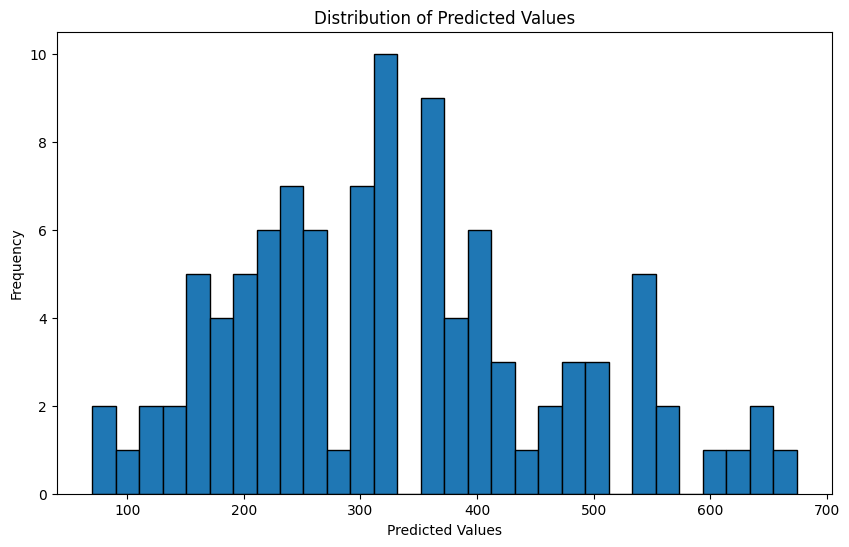

In [12]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"CatBoost MSE: {mse}, MAE: {mae}, R^2: {r2}, mape: {mape}")  


plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, edgecolor='black')
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Values")
plt.show()

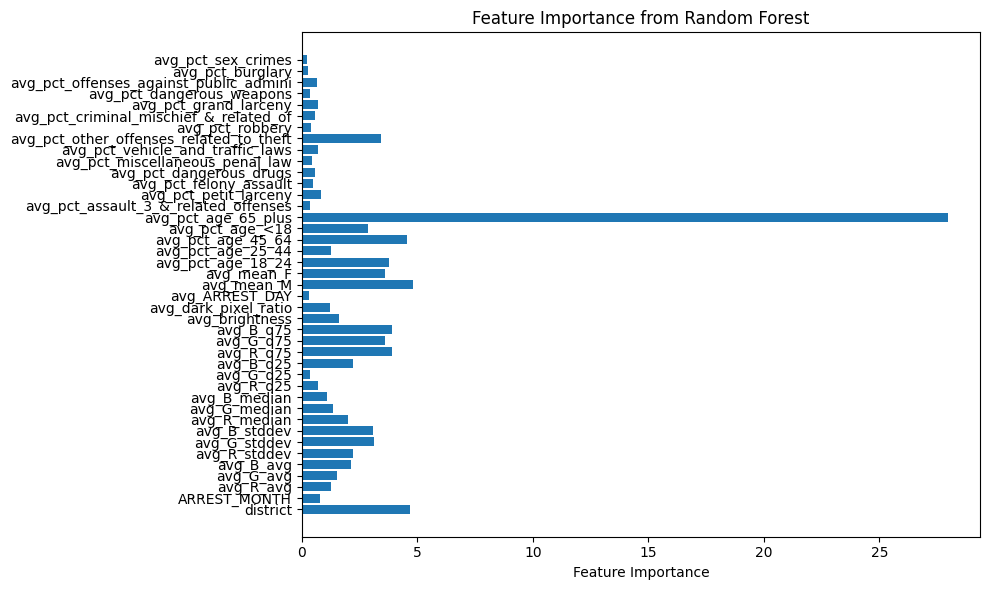

In [14]:
importances = pipe_cat.named_steps["model"].get_feature_importance()


features = X.columns


plt.figure(figsize=(10, 6))

plt.barh(features, importances)

plt.xlabel("Feature Importance")

plt.title("Feature Importance from Random Forest")

plt.tight_layout()

plt.show()

In [3]:
nyc_groupped = nyc.sort_values(by=["district" , "ARREST_MONTH"]).groupby(["district"])
nyc["avg_quantity_crime_in_dist"] = nyc_groupped.rolling(
    window=3, min_periods=1)["total_quantity_crime_in_dist"].mean().reset_index(drop=True)


In [4]:
nyc_groupped = nyc.sort_values(by=["district" , "ARREST_MONTH"]).groupby(["district"])
nyc["lag_total_quantity"] = nyc_groupped["avg_quantity_crime_in_dist"].shift(1)

In [5]:
nyc

,district,ARREST_MONTH,total_quantity_crime_in_dist,avg_R_avg,avg_G_avg,avg_B_avg,avg_R_stddev,avg_G_stddev,avg_B_stddev,avg_R_median,avg_G_median,avg_B_median,avg_R_q25,avg_G_q25,avg_B_q25,avg_R_q75,avg_G_q75,avg_B_q75,avg_brightness,avg_dark_pixel_ratio,avg_ARREST_DAY,avg_mean_M,avg_mean_F,avg_pct_age_18_24,avg_pct_age_25_44,avg_pct_age_45_64,avg_pct_age_<18,avg_pct_age_65_plus,avg_pct_assault_3_&_related_offenses,avg_pct_petit_larceny,avg_pct_felony_assault,avg_pct_dangerous_drugs,avg_pct_miscellaneous_penal_law,avg_pct_vehicle_and_traffic_laws,avg_pct_other_offenses_related_to_theft,avg_pct_robbery,avg_pct_criminal_mischief_&_related_of,avg_pct_grand_larceny,avg_pct_dangerous_weapons,avg_pct_offenses_against_public_admini,avg_pct_burglary,avg_pct_sex_crimes,avg_quantity_crime_in_dist,lag_total_quantity
0,308,10,237,184.221568,162.320797,123.936112,54.336418,66.580114,88.587316,177.0,147.0,88.0,142.0,109.0,50.0,251.0,249.0,246.0,156.826159,0.022655,15.704641,0.795926,0.204074,0.024712,0.027627,0.212294,0.042173,0.020014,0.130802,0.046414,0.143460,0.033755,0.109705,0.025316,0.000000,0.092827,0.059072,0.016878,0.088608,0.008439,0.037975,0.071730,612.000000,425.500000
1,409,1,306,170.170242,143.349063,102.531497,58.084533,74.133940,97.407027,148.0,108.0,49.0,120.0,81.0,25.0,244.0,239.0,232.0,138.683601,0.009935,16.549020,0.836791,0.163209,0.021006,0.031711,0.176937,0.028371,0.013423,0.150327,0.045752,0.088235,0.045752,0.169935,0.078431,0.003268,0.022876,0.019608,0.022876,0.019608,0.081699,0.016340,0.042484,626.000000,NaN
2,203,10,322,193.095111,160.511459,101.417876,43.210504,56.982410,85.135741,189.0,147.0,66.0,162.0,119.0,38.0,231.0,201.0,154.0,151.674815,0.005348,15.204969,0.811040,0.188960,0.028780,0.028580,0.167492,0.044114,0.015334,0.204969,0.046584,0.090062,0.037267,0.099379,0.065217,0.012422,0.065217,0.059006,0.046584,0.027950,0.027950,0.043478,0.009317,655.666667,126.000000
3,212,7,409,154.878125,132.539931,96.609722,68.258769,79.726088,97.748107,130.0,98.0,43.0,96.0,65.0,21.0,238.0,229.0,220.0,128.009259,0.112847,15.975550,0.808489,0.191511,0.024486,0.029742,0.171812,0.043664,0.018278,0.215159,0.029340,0.136919,0.036675,0.090465,0.034230,0.044010,0.070905,0.053790,0.031785,0.056235,0.044010,0.019560,0.019560,656.666667,556.666667
4,204,12,537,191.319898,161.933781,106.316699,40.813629,52.882273,78.130186,187.0,149.0,77.0,162.0,123.0,49.0,223.0,196.0,149.0,153.190126,0.002239,15.657356,0.821014,0.178986,0.025916,0.029795,0.171972,0.034664,0.016051,0.175047,0.089385,0.124767,0.035382,0.055866,0.083799,0.083799,0.029795,0.065177,0.016760,0.037244,0.022346,0.022346,0.013035,677.000000,476.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,303,12,550,177.152151,151.884575,112.032879,54.922927,67.087260,87.057406,168.0,134.0,74.0,132.0,96.0,43.0,236.0,217.0,195.0,147.023202,0.018888,14.270909,0.834770,0.165230,0.021524,0.028588,0.219168,0.042793,0.015602,0.096364,0.063636,0.040000,0.067273,0.052727,0.052727,0.183636,0.058182,0.060000,0.030909,0.040000,0.038182,0.023636,0.010909,103.666667,451.000000
500,210,9,274,169.544570,146.819592,106.826590,64.384825,77.745602,102.909049,157.0,121.0,49.0,113.0,78.0,17.0,250.0,249.0,249.0,141.063584,0.048068,15.310219,0.781747,0.218253,0.025240,0.028483,0.197467,0.037350,0.018837,0.142336,0.109489,0.083942,0.018248,0.054745,0.149635,0.003650,0.036496,0.043796,0.058394,0.007299,0.036496,0.051095,0.010949,99.666667,240.666667
501,309,6,204,187.818017,162.756348,122.803507,57.629867,74.001875,102.182562,181.0,141.0,71.0,137.0,97.0,32.0,254.0,254.0,253.0,157.792624,0.018138,14.578431,0.843672,0.156328,0.022230,0.028917,0.214772,0.027967,0.023306,0.147059,0.024510,0.078431,0.063725,0.068627,0.029412,0.171569,0.009804,0.044118,0.024510,0.068627,0.024510,0.039216,0.024510,97.333333,665.000000
502,301,11,251,199.365692,172.168113,123.846048,47.620476,57.69

In [18]:
crime = nyc.sort_values(by=["district" , "ARREST_MONTH"]).groupby(["district"])
nyc["total_quantity_crime_in_dist_shift"] = crime["total_quantity_crime_in_dist"].shift(-1)
nyc

,district,ARREST_MONTH,total_quantity_crime_in_dist,avg_R_avg,avg_G_avg,avg_B_avg,avg_R_stddev,avg_G_stddev,avg_B_stddev,avg_R_median,avg_G_median,avg_B_median,avg_R_q25,avg_G_q25,avg_B_q25,avg_R_q75,avg_G_q75,avg_B_q75,avg_brightness,avg_dark_pixel_ratio,avg_ARREST_DAY,avg_mean_M,avg_mean_F,avg_pct_age_18_24,avg_pct_age_25_44,avg_pct_age_45_64,avg_pct_age_<18,avg_pct_age_65_plus,avg_pct_assault_3_&_related_offenses,avg_pct_petit_larceny,avg_pct_felony_assault,avg_pct_dangerous_drugs,avg_pct_miscellaneous_penal_law,avg_pct_vehicle_and_traffic_laws,avg_pct_other_offenses_related_to_theft,avg_pct_robbery,avg_pct_criminal_mischief_&_related_of,avg_pct_grand_larceny,avg_pct_dangerous_weapons,avg_pct_offenses_against_public_admini,avg_pct_burglary,avg_pct_sex_crimes,avg_quantity_crime_in_dist,lag_total_quantity,total_quantity_crime_in_dist_shift
0,308,10,237,184.221568,162.320797,123.936112,54.336418,66.580114,88.587316,177.0,147.0,88.0,142.0,109.0,50.0,251.0,249.0,246.0,156.826159,0.022655,15.704641,0.795926,0.204074,0.024712,0.027627,0.212294,0.042173,0.020014,0.130802,0.046414,0.143460,0.033755,0.109705,0.025316,0.000000,0.092827,0.059072,0.016878,0.088608,0.008439,0.037975,0.071730,612.000000,425.500000,250.0
1,409,1,306,170.170242,143.349063,102.531497,58.084533,74.133940,97.407027,148.0,108.0,49.0,120.0,81.0,25.0,244.0,239.0,232.0,138.683601,0.009935,16.549020,0.836791,0.163209,0.021006,0.031711,0.176937,0.028371,0.013423,0.150327,0.045752,0.088235,0.045752,0.169935,0.078431,0.003268,0.022876,0.019608,0.022876,0.019608,0.081699,0.016340,0.042484,626.000000,NaN,283.0
2,203,10,322,193.095111,160.511459,101.417876,43.210504,56.982410,85.135741,189.0,147.0,66.0,162.0,119.0,38.0,231.0,201.0,154.0,151.674815,0.005348,15.204969,0.811040,0.188960,0.028780,0.028580,0.167492,0.044114,0.015334,0.204969,0.046584,0.090062,0.037267,0.099379,0.065217,0.012422,0.065217,0.059006,0.046584,0.027950,0.027950,0.043478,0.009317,655.666667,126.000000,368.0
3,212,7,409,154.878125,132.539931,96.609722,68.258769,79.726088,97.748107,130.0,98.0,43.0,96.0,65.0,21.0,238.0,229.0,220.0,128.009259,0.112847,15.975550,0.808489,0.191511,0.024486,0.029742,0.171812,0.043664,0.018278,0.215159,0.029340,0.136919,0.036675,0.090465,0.034230,0.044010,0.070905,0.053790,0.031785,0.056235,0.044010,0.019560,0.019560,656.666667,556.666667,387.0
4,204,12,537,191.319898,161.933781,106.316699,40.813629,52.882273,78.130186,187.0,149.0,77.0,162.0,123.0,49.0,223.0,196.0,149.0,153.190126,0.002239,15.657356,0.821014,0.178986,0.025916,0.029795,0.171972,0.034664,0.016051,0.175047,0.089385,0.124767,0.035382,0.055866,0.083799,0.083799,0.029795,0.065177,0.016760,0.037244,0.022346,0.022346,0.013035,677.000000,476.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,303,12,550,177.152151,151.884575,112.032879,54.922927,67.087260,87.057406,168.0,134.0,74.0,132.0,96.0,43.0,236.0,217.0,195.0,147.023202,0.018888,14.270909,0.834770,0.165230,0.021524,0.028588,0.219168,0.042793,0.015602,0.096364,0.063636,0.040000,0.067273,0.052727,0.052727,0.183636,0.058182,0.060000,0.030909,0.040000,0.038182,0.023636,0.010909,103.666667,451.000000,NaN
500,210,9,274,169.544570,146.819592,106.826590,64.384825,77.745602,102.909049,157.0,121.0,49.0,113.0,78.0,17.0,250.0,249.0,249.0,141.063584,0.048068,15.310219,0.781747,0.218253,0.025240,0.028483,0.197467,0.037350,0.018837,0.142336,0.109489,0.083942,0.018248,0.054745,0.149635,0.003650,0.036496,0.043796,0.058394,0.007299,0.036496,0.051095,0.010949,99.666667,240.666667,266.0
501,309,6,204,187.818017,162.756348,122.803507,57.629867,74.001875,102.182562,181.0,141.0,71.0,137.0,97.0,32.0,254.0,254.0,253.0,157.792624,0.018138,14.578431,0.843672,0.156328,0.022230,0.028917,0.214772,0.027967,0.023306,0.147059,0.024510,0.078431,0.063725,0.068627,0.029412,0.171569,0.009804,0.044118,0.024510,0.068627,0.024510,0.039216,0.024510,97.3333

In [18]:
nyc.columns

Index(['district', 'ARREST_MONTH', 'total_quantity_crime_in_dist', 'avg_R_avg',
       'avg_G_avg', 'avg_B_avg', 'avg_R_stddev', 'avg_G_stddev',
       'avg_B_stddev', 'avg_R_median', 'avg_G_median', 'avg_B_median',
       'avg_R_q25', 'avg_G_q25', 'avg_B_q25', 'avg_R_q75', 'avg_G_q75',
       'avg_B_q75', 'avg_brightness', 'avg_dark_pixel_ratio', 'avg_ARREST_DAY',
       'avg_mean_M', 'avg_mean_F', 'avg_pct_age_18_24', 'avg_pct_age_25_44',
       'avg_pct_age_45_64', 'avg_pct_age_<18', 'avg_pct_age_65_plus',
       'avg_pct_assault_3_&_related_offenses', 'avg_pct_petit_larceny',
       'avg_pct_felony_assault', 'avg_pct_dangerous_drugs',
       'avg_pct_miscellaneous_penal_law', 'avg_pct_vehicle_and_traffic_laws',
       'avg_pct_other_offenses_related_to_theft', 'avg_pct_robbery',
       'avg_pct_criminal_mischief_&_related_of', 'avg_pct_grand_larceny',
       'avg_pct_dangerous_weapons', 'avg_pct_offenses_against_public_admini',
       'avg_pct_burglary', 'avg_pct_sex_crimes'],
    

In [24]:
rolling_cols = [col for col in nyc.columns if col.startswith("avg_")]

nyc_sorted = nyc.sort_values(by=["district", "ARREST_MONTH"])
grouped = nyc_sorted.groupby("district")

for col in rolling_cols:
    nyc_sorted[f"{col}_rolling_mean"] = grouped[col].rolling(window=3, min_periods=1).mean().reset_index(drop=True)
    nyc_sorted[f"{col}_lag"] = grouped[f"{col}_rolling_mean"].shift(1)

nyc_sorted

,district,ARREST_MONTH,total_quantity_crime_in_dist,avg_R_avg,avg_G_avg,avg_B_avg,avg_R_stddev,avg_G_stddev,avg_B_stddev,avg_R_median,avg_G_median,avg_B_median,avg_R_q25,avg_G_q25,avg_B_q25,avg_R_q75,avg_G_q75,avg_B_q75,avg_brightness,avg_dark_pixel_ratio,avg_ARREST_DAY,avg_mean_M,avg_mean_F,avg_pct_age_18_24,avg_pct_age_25_44,avg_pct_age_45_64,avg_pct_age_<18,avg_pct_age_65_plus,avg_pct_assault_3_&_related_offenses,avg_pct_petit_larceny,avg_pct_felony_assault,avg_pct_dangerous_drugs,avg_pct_miscellaneous_penal_law,avg_pct_vehicle_and_traffic_laws,avg_pct_other_offenses_related_to_theft,avg_pct_robbery,avg_pct_criminal_mischief_&_related_of,avg_pct_grand_larceny,avg_pct_dangerous_weapons,avg_pct_offenses_against_public_admini,avg_pct_burglary,avg_pct_sex_crimes,avg_quantity_crime_in_dist,lag_total_quantity,total_quantity_crime_in_dist_shift,avg_R_avg_rolling_mean,avg_R_avg_lag,avg_G_avg_rolling_mean,avg_G_avg_lag,avg_B_avg_rolling_mean,avg_B_avg_lag,avg_R_stddev_rolling_mean,avg_R_stddev_lag,avg_G_stddev_rolling_mean,avg_G_stddev_lag,avg_B_stddev_rolling_mean,avg_B_stddev_lag,avg_R_median_rolling_mean,avg_R_median_lag,avg_G_median_rolling_mean,avg_G_median_lag,avg_B_median_rolling_mean,avg_B_median_lag,avg_R_q25_rolling_mean,avg_R_q25_lag,avg_G_q25_rolling_mean,avg_G_q25_lag,avg_B_q25_rolling_mean,avg_B_q25_lag,avg_R_q75_rolling_mean,avg_R_q75_lag,avg_G_q75_rolling_mean,avg_G_q75_lag,avg_B_q75_rolling_mean,avg_B_q75_lag,avg_brightness_rolling_mean,avg_brightness_lag,avg_dark_pixel_ratio_rolling_mean,avg_dark_pixel_ratio_lag,avg_ARREST_DAY_rolling_mean,avg_ARREST_DAY_lag,avg_mean_M_rolling_mean,avg_mean_M_lag,avg_mean_F_rolling_mean,avg_mean_F_lag,avg_pct_age_18_24_rolling_mean,avg_pct_age_18_24_lag,avg_pct_age_25_44_rolling_mean,avg_pct_age_25_44_lag,avg_pct_age_45_64_rolling_mean,avg_pct_age_45_64_lag,avg_pct_age_<18_rolling_mean,avg_pct_age_<18_lag,avg_pct_age_65_plus_rolling_mean,avg_pct_age_65_plus_lag,avg_pct_assault_3_&_related_offenses_rolling_mean,avg_pct_assault_3_&_related_offenses_lag,avg_pct_petit_larceny_rolling_mean,avg_pct_petit_larceny_lag,avg_pct_felony_assault_rolling_mean,avg_pct_felony_assault_lag,avg_pct_dangerous_drugs_rolling_mean,avg_pct_dangerous_drugs_lag,avg_pct_miscellaneous_penal_law_rolling_mean,avg_pct_miscellaneous_penal_law_lag,avg_pct_vehicle_and_traffic_laws_rolling_mean,avg_pct_vehicle_and_traffic_laws_lag,avg_pct_other_offenses_related_to_theft_rolling_mean,avg_pct_other_offenses_related_to_theft_lag,avg_pct_robbery_rolling_mean,avg_pct_robbery_lag,avg_pct_criminal_mischief_&_related_of_rolling_mean,avg_pct_criminal_mischief_&_related_of_lag,avg_pct_grand_larceny_rolling_mean,avg_pct_grand_larceny_lag,avg_pct_dangerous_weapons_rolling_mean,avg_pct_dangerous_weapons_lag,avg_pct_offenses_against_public_admini_rolling_mean,avg_pct_offenses_against_public_admini_lag,avg_pct_burglary_rolling_mean,avg_pct_burglary_lag,avg_pct_sex_crimes_rolling_mean,avg_pct_sex_crimes_lag,avg_quantity_crime_in_dist_rolling_mean,avg_quantity_crime_in_dist_lag
254,201,1,612,201.421839,172.365291,116.346766,39.26345,52.518092,81.163974,199.0,160.0,86.0,173.0,132.0,54.0,237.0,217.0,177.0,163.377966,0.000975,15.594771,0.844296,0.155704,0.022090,0.030296,0.201499,0.026288,0.011657,0.153595,0.112745,0.104575,0.086601,0.021242,0.084967,0.062092,0.053922,0.044118,0.011438,0.042484,0.039216,0.026144,0.014706,184.000000,NaN,640.0,151.150937,NaN,128.148750,NaN,87.335625,NaN,54.110125,NaN,64.980034,NaN,83.096116,NaN,133.0,NaN,102.0,NaN,50.0,NaN,111.0,NaN,78.0,NaN,26.0,NaN,183.0,NaN,166.0,NaN,127.0,NaN,122.211771,NaN,0.025625,NaN,15.322341,NaN,0.868357,NaN,0.131643,NaN,0.025632,NaN,0.029376,NaN,0.184300,NaN,0.036080,NaN,0.012677,NaN,0.098181,NaN,0.104707,NaN,0.043583,NaN,0.061062,NaN,0.095341,NaN,0.218905,NaN,0.003436,NaN,0.028096,NaN,0.045193,NaN,0.045540,NaN,0.051184,NaN,0.006765,NaN,0.011977,NaN,0.030627,NaN,290.888889,NaN
27,201,2,640,201.421839,172.365291,116.346766,39.26345,52.518092,81.163974,199.0,160.0,86.0,173.0,132.

In [ ]:
nyc_sorted.dropna(subset=["total_quantity_crime_in_dist_shift", "lag_total_quantity"], inplace=True)
nyc_sorted

,district,ARREST_MONTH,total_quantity_crime_in_dist,avg_R_avg,avg_G_avg,avg_B_avg,avg_R_stddev,avg_G_stddev,avg_B_stddev,avg_R_median,avg_G_median,avg_B_median,avg_R_q25,avg_G_q25,avg_B_q25,avg_R_q75,avg_G_q75,avg_B_q75,avg_brightness,avg_dark_pixel_ratio,avg_ARREST_DAY,avg_mean_M,avg_mean_F,avg_pct_age_18_24,avg_pct_age_25_44,avg_pct_age_45_64,avg_pct_age_<18,avg_pct_age_65_plus,avg_pct_assault_3_&_related_offenses,avg_pct_petit_larceny,avg_pct_felony_assault,avg_pct_dangerous_drugs,avg_pct_miscellaneous_penal_law,avg_pct_vehicle_and_traffic_laws,avg_pct_other_offenses_related_to_theft,avg_pct_robbery,avg_pct_criminal_mischief_&_related_of,avg_pct_grand_larceny,avg_pct_dangerous_weapons,avg_pct_offenses_against_public_admini,avg_pct_burglary,avg_pct_sex_crimes,avg_quantity_crime_in_dist,lag_total_quantity,total_quantity_crime_in_dist_shift,avg_R_avg_rolling_mean,avg_R_avg_lag,avg_G_avg_rolling_mean,avg_G_avg_lag,avg_B_avg_rolling_mean,avg_B_avg_lag,avg_R_stddev_rolling_mean,avg_R_stddev_lag,avg_G_stddev_rolling_mean,avg_G_stddev_lag,avg_B_stddev_rolling_mean,avg_B_stddev_lag,avg_R_median_rolling_mean,avg_R_median_lag,avg_G_median_rolling_mean,avg_G_median_lag,avg_B_median_rolling_mean,avg_B_median_lag,avg_R_q25_rolling_mean,avg_R_q25_lag,avg_G_q25_rolling_mean,avg_G_q25_lag,avg_B_q25_rolling_mean,avg_B_q25_lag,avg_R_q75_rolling_mean,avg_R_q75_lag,avg_G_q75_rolling_mean,avg_G_q75_lag,avg_B_q75_rolling_mean,avg_B_q75_lag,avg_brightness_rolling_mean,avg_brightness_lag,avg_dark_pixel_ratio_rolling_mean,avg_dark_pixel_ratio_lag,avg_ARREST_DAY_rolling_mean,avg_ARREST_DAY_lag,avg_mean_M_rolling_mean,avg_mean_M_lag,avg_mean_F_rolling_mean,avg_mean_F_lag,avg_pct_age_18_24_rolling_mean,avg_pct_age_18_24_lag,avg_pct_age_25_44_rolling_mean,avg_pct_age_25_44_lag,avg_pct_age_45_64_rolling_mean,avg_pct_age_45_64_lag,avg_pct_age_<18_rolling_mean,avg_pct_age_<18_lag,avg_pct_age_65_plus_rolling_mean,avg_pct_age_65_plus_lag,avg_pct_assault_3_&_related_offenses_rolling_mean,avg_pct_assault_3_&_related_offenses_lag,avg_pct_petit_larceny_rolling_mean,avg_pct_petit_larceny_lag,avg_pct_felony_assault_rolling_mean,avg_pct_felony_assault_lag,avg_pct_dangerous_drugs_rolling_mean,avg_pct_dangerous_drugs_lag,avg_pct_miscellaneous_penal_law_rolling_mean,avg_pct_miscellaneous_penal_law_lag,avg_pct_vehicle_and_traffic_laws_rolling_mean,avg_pct_vehicle_and_traffic_laws_lag,avg_pct_other_offenses_related_to_theft_rolling_mean,avg_pct_other_offenses_related_to_theft_lag,avg_pct_robbery_rolling_mean,avg_pct_robbery_lag,avg_pct_criminal_mischief_&_related_of_rolling_mean,avg_pct_criminal_mischief_&_related_of_lag,avg_pct_grand_larceny_rolling_mean,avg_pct_grand_larceny_lag,avg_pct_dangerous_weapons_rolling_mean,avg_pct_dangerous_weapons_lag,avg_pct_offenses_against_public_admini_rolling_mean,avg_pct_offenses_against_public_admini_lag,avg_pct_burglary_rolling_mean,avg_pct_burglary_lag,avg_pct_sex_crimes_rolling_mean,avg_pct_sex_crimes_lag,avg_quantity_crime_in_dist_rolling_mean,avg_quantity_crime_in_dist_lag
27,201,2,640,201.421839,172.365291,116.346766,39.26345,52.518092,81.163974,199.0,160.0,86.0,173.0,132.0,54.0,237.0,217.0,177.0,163.377966,0.000975,13.771875,0.844296,0.155704,0.022090,0.030296,0.201499,0.026288,0.011657,0.164062,0.087500,0.085938,0.095312,0.035937,0.098438,0.062500,0.048437,0.031250,0.018750,0.039062,0.032812,0.028125,0.015625,353.333333,184.000000,715.0,193.095111,151.150937,160.511459,128.148750,101.417876,87.335625,43.210504,54.110125,56.982410,64.980034,85.135741,83.096116,189.0,133.0,147.0,102.0,66.0,50.0,162.0,111.0,119.0,78.0,38.0,26.0,231.0,183.0,201.0,166.0,154.0,127.0,151.674815,122.211771,0.005348,0.025625,14.646722,15.322341,0.811040,0.868357,0.188960,0.131643,0.028780,0.025632,0.028580,0.029376,0.167492,0.184300,0.044114,0.036080,0.015334,0.012677,0.180152,0.098181,0.025541,0.104707,0.121639,0.043583,0.058399,0.061062,0.062678,0.095341,0.066592,0.218905,0.004654,0.003436,0.052585,0.028096,0.044324,0.045193,0.046693,0.045540,0.044

In [ ]:
y = nyc_sorted["total_quantity_crime_in_dist_shift"]
X = nyc_sorted.drop(columns=["total_quantity_crime_in_dist_shift"])

In [26]:
cat_cols =X.select_dtypes(include='object')
num_cols = X.select_dtypes(exclude='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [28]:
num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

preprocessor = ColumnTransformer(
    [("num", QuantileTransformer(output_distribution="normal"), num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)

n_samples = X_train.shape[0]

num_pipe = Pipeline([
    ("quantile", QuantileTransformer(
        output_distribution="normal",
        n_quantiles=n_samples,      
        random_state=42
    ))
])

preprocessor = ColumnTransformer(
    [("num", num_pipe, num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)

/opt/conda/envs/ml_practice/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(


In [29]:
num_pipe = Pipeline([
    ("power", PowerTransformer())
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols)
], remainder='passthrough') 

pipe_cat = Pipeline([
    ("preprocessing", preprocessor),
    ("model", CatBoostRegressor(
        cat_features=cat_cols,
        verbose=100,
        random_state=42
    ))
])

pipe_cat.fit(X_train, y_train)

test_score = pipe_cat.score(X_test, y_test)
print("CatBoost TEST R^2 score:", test_score)

scores_cat = cross_val_score(pipe_cat, X_train, y_train, cv=5, scoring='r2')

print("CatBoost CV R^2 score:", scores_cat.mean())

Learning rate set to 0.035466
0:	learn: 164.3891315	total: 3.21ms	remaining: 3.21s
100:	learn: 105.6601981	total: 336ms	remaining: 2.99s
200:	learn: 76.0780739	total: 641ms	remaining: 2.55s
300:	learn: 52.7613598	total: 947ms	remaining: 2.2s
400:	learn: 36.3431972	total: 1.25s	remaining: 1.87s
500:	learn: 24.7719015	total: 1.58s	remaining: 1.57s
600:	learn: 17.7665038	total: 1.89s	remaining: 1.25s
700:	learn: 12.8465770	total: 2.19s	remaining: 936ms
800:	learn: 9.4845709	total: 2.49s	remaining: 620ms
900:	learn: 6.7365612	total: 2.81s	remaining: 308ms
999:	learn: 4.7894539	total: 3.12s	remaining: 0us
CatBoost TEST R^2 score: 0.4637063943840901
Learning rate set to 0.034231
0:	learn: 167.1950632	total: 3.26ms	remaining: 3.25s
100:	learn: 104.0866530	total: 299ms	remaining: 2.66s
200:	learn: 74.6847144	total: 598ms	remaining: 2.38s
300:	learn: 48.3075346	total: 904ms	remaining: 2.1s
400:	learn: 30.4784270	total: 1.2s	remaining: 1.79s
500:	learn: 19.3454903	total: 1.5s	remaining: 1.49s
60

In [30]:
y_pred = pipe_cat.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"CatBoost MSE: {mse}, MAE: {mae}, R^2: {r2}, mape: {mape}") 

CatBoost MSE: 17344.30761663489, MAE: 102.6927013525564, R^2: 0.4637063943840901, mape: 0.375106007014016


In [ ]:
((y_test- y_pred)**2).mean()

np.float64(17344.30761663489)

In [38]:
(5**2 + 5**2)/2

25.0

In [ ]:
(1**2 + 9**2)/2

41.0

In [41]:
(abs(y_test- y_pred)).mean()

np.float64(102.6927013525564)

In [ ]:
(abs(1) + abs(9))/2

5.0

In [50]:
(abs(5) + abs(5))/2

5.0

In [53]:
(abs((y_test - y_pred)/y_test)).mean()

np.float64(0.375106007014016)

In [ ]:
(abs(5))

### Dataset With Ceveral years

In [104]:
nyc_years = pd.read_parquet("../data/crime_nyc_years_aggregated.parquet")
nyc_years

,district,CRIME_YEAR,CRIME_MONTH,R_avg,G_avg,B_avg,R_stddev,G_stddev,B_stddev,R_median,G_median,B_median,R_q25,G_q25,B_q25,R_q75,G_q75,B_q75,brightness_avg,dark_pixel_ratio,BORO_NM,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CRIME_DAY,total_crimes_dist,mean_white,mean_black,mean_black_hispanic,mean_hispanic,mean_amer_indian,mean_asian,pct_age_18_24,pct_age_25_44,pct_age_45_64,pct_age_<18,pct_age_65_plus,mean_M,mean_F,mean_U,pct_petit_larceny,pct_harrassment_2,pct_assault_3_&_related_offenses,pct_criminal_mischief_&_related_of,pct_grand_larceny,pct_vehicle_and_traffic_laws,pct_felony_assault,pct_miscellaneous_penal_law,pct_dangerous_drugs,pct_other_offenses_related_to_theft,pct_off._agnst_pub_ord_sensblty_&,pct_grand_larceny_of_motor_vehicle,pct_robbery,pct_burglary,pct_sex_crimes
0,402,2024,7,191.711560,171.540376,134.402378,51.301437,63.215406,85.477459,191,164,110,147,116,59,250,247,244,165.884771,0.000553,QUEENS,UNKNOWN,M,UNKNOWN,UNKNOWN,E,5,3,0.333333,0.00,0.333333,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
1,402,2024,7,191.711560,171.540376,134.402378,51.301437,63.215406,85.477459,191,164,110,147,116,59,250,247,244,165.884771,0.000553,QUEENS,UNKNOWN,F,25-44,BLACK HISPANIC,F,21,3,0.333333,0.00,0.333333,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
2,402,2024,7,191.711560,171.540376,134.402378,51.301437,63.215406,85.477459,191,164,110,147,116,59,250,247,244,165.884771,0.000553,QUEENS,(null),(null),45-64,WHITE,M,5,3,0.333333,0.00,0.333333,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
3,402,2023,3,191.711560,171.540376,134.402378,51.301437,63.215406,85.477459,191,164,110,147,116,59,250,247,244,165.884771,0.000553,QUEENS,UNKNOWN,U,UNKNOWN,UNKNOWN,D,3,1,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,306,2022,3,200.255241,189.095912,163.675052,55.397740,64.869202,86.828887,215,208,180,156,131,80,254,254,253,184.342068,0.011530,BROOKLYN,UNKNOWN,M,25-44,ASIAN / PACIFIC ISLANDER,F,3,1,0.000000,0.00,0.000000,0.0,0.0,1.0,0.0,0.000,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89090,303,2023,2,177.152151,151.884575,112.032879,54.922927,67.087260,87.057406,168,134,74,132,96,43,236,217,195,147.023202,0.018888,BROOKLYN,BLACK,F,UNKNOWN,UNKNOWN,D,1,4,0.000000,0.25,0.000000,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.000000,0.500000,0.5,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
89091,303,2023,2,177.152151,151.884575,112.032879,54.922927,67.087260,87.057406,168,134,74,132,96,43,236,217,195,147.023202,0.018888,BROOKLYN,UNKNOWN,U,45-64,BLACK,F,1,4,0.000000,0.25,0.000000,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.000000,0.500000,0.5,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
89092,303,2023,2,177.152151,151.884575,112.032879,54.922927,67.087260,87.057406,168,134,74,132,96,43,236,217,195,147.023202,0.018888,BROOKLYN,UNKNOWN,U,UNKNOWN,UNKNOWN,D,17,4,0.000000,0.25,0.000000,0.0,0.0,0.0,0.0,0.025,0.0,0.0,0.0,0.000000,0.500000,0.5,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
89093,208,2023,2,152.986663,131.678280,97.442842,68.998069,79.310289,97.008060,136,102,47,95,68,22,233,224,219,127.369261,0.143440,BRONX,UNKNOWN,M,<18,WHITE HISPANIC,F,1,1,0.000000,0.00,0.000000,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [105]:
agg_df = nyc_years.sort_values(by=["district" , "CRIME_YEAR","CRIME_MONTH"]).groupby(["district", "CRIME_YEAR", "CRIME_MONTH"]).agg(
    avg_quantity_crime_in_dist=('total_crimes_dist', 'mean'),
    R_avg=('R_avg', 'mean'),
    G_avg=('G_avg', 'mean'),
    B_avg=('B_avg', 'mean'),
    R_stddev=('R_stddev', 'mean'),
    G_stddev=('G_stddev', 'mean'),
    B_stddev=('B_stddev', 'mean'),
    R_median=('R_median', 'mean'),
    G_median=('G_median', 'mean'),
    B_median=('B_median', 'mean'),
    R_q25=('R_q25', 'mean'),
    G_q25=('G_q25', 'mean'),
    B_q25=('B_q25', 'mean'),
    R_q75=('R_q75', 'mean'),
    G_q75=('G_q75', 'mean'),
    B_q75=('B_q75', 'mean'),
    brightness_avg=('brightness_avg', 'mean'),
    dark_pixel_ratio=('dark_pixel_ratio', 'mean'),
    mean_white=('mean_white', 'mean'),
    mean_black=('mean_black', 'mean'),
    mean_black_hispanic=('mean_black_hispanic', 'mean'),
    mean_hispanic=('mean_hispanic', 'mean'),
    mean_amer_indian=('mean_amer_indian', 'mean'),
    mean_asian=('mean_asian', 'mean'),
    pct_age_18_24=('pct_age_18_24', 'mean'),
    pct_age_25_44=('pct_age_25_44', 'mean'),
    pct_age_45_64=('pct_age_45_64', 'mean'),
    pct_age_18	=('pct_age_<18', 'mean'),
    pct_age_65_plus=('pct_age_65_plus', 'mean'),
    mean_M=('mean_M', 'mean'),
    mean_F=('mean_F', 'mean'),
    mean_U=('mean_U', 'mean'),
    pct_petit_larceny=('pct_petit_larceny', 'mean'),
    pct_harrassment_2=('pct_harrassment_2', 'mean'),
    pct_assault_3_related_offenses=('pct_assault_3_&_related_offenses', 'mean'),
    pct_grand_larceny=('pct_grand_larceny', 'mean'),
    pct_vehicle_and_traffic_laws=('pct_vehicle_and_traffic_laws', 'mean'),
    pct_felony_assault=('pct_felony_assault', 'mean'),
    pct_miscellaneous_penal_law=('pct_miscellaneous_penal_law', 'mean'),
    pct_dangerous_drugs=('pct_dangerous_drugs', 'mean'),
    pct_other_offenses_related_to_theft=('pct_other_offenses_related_to_theft', 'mean'),
    pct_grand_larceny_of_motor_vehicle=('pct_grand_larceny_of_motor_vehicle', 'mean'),
    pct_robbery=('pct_robbery', 'mean'),
    pct_burglary=('pct_burglary', 'mean'),
    pct_sex_crimes=('pct_sex_crimes', 'mean')

)
agg_df

avg_quantity_crime_in_dist       R_avg  \
district CRIME_YEAR CRIME_MONTH                                           
201      2002       3                                   1.0  201.421839   
         2013       1                                   1.0  201.421839   
         2016       11                                  1.0  201.421839   
         2017       2                                   1.0  201.421839   
         2020       2                                   1.0  201.421839   
...                                                     ...         ...   
503      2024       11                                 13.0  152.500751   
                    12                                 40.0  152.500751   
         2025       1                                 307.0  152.500751   
                    2                                 280.0  152.500751   
                    3                                 313.0  152.500751   

                                      G_avg       B_avg  R_stddev   G_stddev  \
district CRIME_YEAR CRIME_MONTH                                                
201      2002       3            172.365291  116.346766  39.26345  52.518092   
         2013       1            172.365291  116.346766  39.26345  52.518092   
         2016       11           172.365291  116.346766  39.26345  52.518092   
         2017       2            172.365291  116.346766  39.26345  52.518092   
         2020       2            172.365291  116.346766  39.26345  52.518092   
...                                     ...         ...       ...        ...   
503      2024       11           136.878003  114.230105  75.39031  87.659545   
                    12           136.878003  114.230105  75.39031  87.659545   
         2025       1            136.878003  114.230105  75.39031  87.659545   
                    2            136.878003  114.230105  75.39031  87.659545   
                    3            136.878003  114.230105  75.39031  87.659545   

                                   B_stddev  R_median  G_median  B_median  \
district CRIME_YEAR CRIME_MONTH                                             
201      2002       3             81.163974     199.0     160.0      86.0   
         2013       1             81.163974     199.0     160.0      86.0   
         2016       11            81.163974     199.0     160.0      86.0   
         2017       2             81.163974     199.0     160.0      86.0   
         2020       2             81.163974     199.0     160.0      86.0   
...                                     ...       ...       ...       ...   
503      2024       11           103.371512     125.0     105.0      65.0   
                    12           103.371512     125.0     105.0      65.0   
         2025       1            103.371512     125.0     105.0      65.0   
                    2            103.371512     125.0     105.0      65.0   
                    3            103.371512     125.0     105.0      65.0   

                                 R_q25  G_q25  B_q25  R_q75  G_q75  B_q75  \
district CRIME_YEAR CRIME_MONTH                                             
201      2002       3            173.0  132.0   54.0  237.0  217.0  177.0   
         2013       1            173.0  132.0   54.0  237.0  217.0  177.0   
         2016       11           173.0  132.0   54.0  237.0  217.0  177.0   
         2017       2            173.0  132.0   54.0  237.0  217.0  177.0   
         2020       2            173.0  132.0   54.0  237.0  217.0  177.0   
...                                ...    ...    ...    ...    ...    ...   
503      2024       11            85.0   56.0   18.0  252.0  253.0  251.0   
                    12            85.0   56.0   18.0  252.0  253.0  251.0   
         2025       1             85.0   56.0   18.0  252.0  253.0  251.0   
                    2             85.0   56.0   18.0  252.0  253.0  251.0   
                    3             85.0   56.0   18.0  252.0  253.0  251.0   

            

In [106]:
agg_df['avg_quantity_crime_in_dist_lag1'] = agg_df.groupby('district')['avg_quantity_crime_in_dist'].shift(1)
agg_df['avg_quantity_crime_in_dist_lag2'] = agg_df.groupby('district')['avg_quantity_crime_in_dist'].shift(2)
agg_df['avg_quantity_crime_in_dist_lag0'] = agg_df.groupby('district')['avg_quantity_crime_in_dist'].shift(0)

In [107]:
agg_df['avg_quantity_crime_in_dist_lead1'] = agg_df.groupby('district')['avg_quantity_crime_in_dist'].shift(-1)


In [67]:
agg_df

avg_quantity_crime_in_dist       R_avg  \
district CRIME_YEAR CRIME_MONTH                                           
201      2002       3                                   1.0  201.421839   
         2013       1                                   1.0  201.421839   
         2016       11                                  1.0  201.421839   
         2017       2                                   1.0  201.421839   
         2020       2                                   1.0  201.421839   
...                                                     ...         ...   
503      2024       11                                 13.0  152.500751   
                    12                                 40.0  152.500751   
         2025       1                                 307.0  152.500751   
                    2                                 280.0  152.500751   
                    3                                 313.0  152.500751   

                                      G_avg       B_avg  R_stddev   G_stddev  \
district CRIME_YEAR CRIME_MONTH                                                
201      2002       3            172.365291  116.346766  39.26345  52.518092   
         2013       1            172.365291  116.346766  39.26345  52.518092   
         2016       11           172.365291  116.346766  39.26345  52.518092   
         2017       2            172.365291  116.346766  39.26345  52.518092   
         2020       2            172.365291  116.346766  39.26345  52.518092   
...                                     ...         ...       ...        ...   
503      2024       11           136.878003  114.230105  75.39031  87.659545   
                    12           136.878003  114.230105  75.39031  87.659545   
         2025       1            136.878003  114.230105  75.39031  87.659545   
                    2            136.878003  114.230105  75.39031  87.659545   
                    3            136.878003  114.230105  75.39031  87.659545   

                                   B_stddev  R_median  G_median  B_median  \
district CRIME_YEAR CRIME_MONTH                                             
201      2002       3             81.163974     199.0     160.0      86.0   
         2013       1             81.163974     199.0     160.0      86.0   
         2016       11            81.163974     199.0     160.0      86.0   
         2017       2             81.163974     199.0     160.0      86.0   
         2020       2             81.163974     199.0     160.0      86.0   
...                                     ...       ...       ...       ...   
503      2024       11           103.371512     125.0     105.0      65.0   
                    12           103.371512     125.0     105.0      65.0   
         2025       1            103.371512     125.0     105.0      65.0   
                    2            103.371512     125.0     105.0      65.0   
                    3            103.371512     125.0     105.0      65.0   

                                 R_q25  G_q25  B_q25  R_q75  G_q75  B_q75  \
district CRIME_YEAR CRIME_MONTH                                             
201      2002       3            173.0  132.0   54.0  237.0  217.0  177.0   
         2013       1            173.0  132.0   54.0  237.0  217.0  177.0   
         2016       11           173.0  132.0   54.0  237.0  217.0  177.0   
         2017       2            173.0  132.0   54.0  237.0  217.0  177.0   
         2020       2            173.0  132.0   54.0  237.0  217.0  177.0   
...                                ...    ...    ...    ...    ...    ...   
503      2024       11            85.0   56.0   18.0  252.0  253.0  251.0   
                    12            85.0   56.0   18.0  252.0  253.0  251.0   
         2025       1             85.0   56.0   18.0  252.0  253.0  251.0   
                    2             85.0   56.0   18.0  252.0  253.0  251.0   
                    3             85.0   56.0   18.0  252.0  253.0  251.0   

            

In [108]:
agg_df['mean_M_lag1'] = agg_df.groupby('district')['mean_M'].shift(1)
agg_df['mean_F_lag1'] = agg_df.groupby('district')['mean_F'].shift(1)
agg_df['mean_U_lag1'] = agg_df.groupby('district')['mean_U'].shift(1)

agg_df['mean_M_diff'] = agg_df['mean_M'] - agg_df['mean_M_lag1']
agg_df['mean_F_diff'] = agg_df['mean_F'] - agg_df['mean_F_lag1']
agg_df['mean_U_diff'] = agg_df['mean_U'] - agg_df['mean_U_lag1']

In [109]:
agg_df['mean_white_lag1'] = agg_df.groupby('district')['mean_white'].shift(1)
agg_df['mean_black_lag1'] = agg_df.groupby('district')['mean_black'].shift(1)
agg_df['mean_white_rolling3'] = agg_df.groupby('district')['mean_white'].transform(lambda x: x.rolling(window=3).mean())
agg_df['mean_black_rolling3'] = agg_df.groupby('district')['mean_black'].transform(lambda x: x.rolling(window=3).mean())

In [110]:
agg_df['mean_white_lag2'] = agg_df.groupby('district')['mean_white'].shift(2)
agg_df['mean_black_lag2'] = agg_df.groupby('district')['mean_black'].shift(2)

agg_df['mean_white_lead1'] = agg_df.groupby('district')['mean_white'].shift(-1)
agg_df['mean_white_lead2'] = agg_df.groupby('district')['mean_white'].shift(-2)


In [111]:
agg_df['pct_age_18_24_lag1'] = agg_df.groupby('district')['pct_age_18_24'].shift(1)
agg_df['pct_age_18_24_lag2'] = agg_df.groupby('district')['pct_age_18_24'].shift(2)
agg_df['pct_age_18_24_lead1'] = agg_df.groupby('district')['pct_age_18_24'].shift(-1)
agg_df['pct_age_18_24_lead2'] = agg_df.groupby('district')['pct_age_18_24'].shift(-2)

agg_df['pct_age_45_64_lag1'] = agg_df.groupby('district')['pct_age_45_64'].shift(1)
agg_df['pct_age_45_64_lag2'] = agg_df.groupby('district')['pct_age_45_64'].shift(2)
agg_df['pct_age_45_64_lead1'] = agg_df.groupby('district')['pct_age_45_64'].shift(-1)
agg_df['pct_age_45_64_lead2'] = agg_df.groupby('district')['pct_age_45_64'].shift(-2)

agg_df['pct_age_18_lag1'] = agg_df.groupby('district')['pct_age_18'].shift(1)
agg_df['pct_age_18_lag2'] = agg_df.groupby('district')['pct_age_18'].shift(2)
agg_df['pct_age_18_lead1'] = agg_df.groupby('district')['pct_age_18'].shift(-1)
agg_df['pct_age_18_lead2'] = agg_df.groupby('district')['pct_age_18'].shift(-2)


In [112]:
agg_df['avg_quantity_crime_in_dist_increased'] = (agg_df['avg_quantity_crime_in_dist'] > agg_df['avg_quantity_crime_in_dist_lag1']).astype(int)
agg_df['mean_M_increased'] = (agg_df['mean_M'] > agg_df['mean_M_lag1']).astype(int)
agg_df['mean_F_increased'] = (agg_df['mean_F'] > agg_df['mean_F_lag1']).astype(int)


In [113]:
agg_df['brightness_avg_lag1'] = agg_df.groupby('district')['brightness_avg'].shift(1)
agg_df['brightness_avg_lag2'] = agg_df.groupby('district')['brightness_avg'].shift(2)
agg_df['brightness_avg_lead1'] = agg_df.groupby('district')['brightness_avg'].shift(-1)
agg_df['brightness_avg_lead2'] = agg_df.groupby('district')['brightness_avg'].shift(-2)


In [114]:
agg_df['pct_petit_larceny_lag1'] = agg_df.groupby('district')['pct_petit_larceny'].shift(1)
agg_df['pct_petit_larceny_lag2'] = agg_df.groupby('district')['pct_petit_larceny'].shift(2)
agg_df['pct_petit_larceny_lead1'] = agg_df.groupby('district')['pct_petit_larceny'].shift(-1)
agg_df['pct_petit_larceny_lead2'] = agg_df.groupby('district')['pct_petit_larceny'].shift(-2)

agg_df['pct_grand_larceny_lag1'] = agg_df.groupby('district')['pct_grand_larceny'].shift(1)
agg_df['pct_grand_larceny_lag2'] = agg_df.groupby('district')['pct_grand_larceny'].shift(2)
agg_df['pct_grand_larceny_lead1'] = agg_df.groupby('district')['pct_grand_larceny'].shift(-1)
agg_df['pct_grand_larceny_lead2'] = agg_df.groupby('district')['pct_grand_larceny'].shift(-2)


In [115]:
agg_df['pct_harrassment_2_lag1'] = agg_df.groupby('district')['pct_harrassment_2'].shift(1)
agg_df['pct_harrassment_2_lag2'] = agg_df.groupby('district')['pct_harrassment_2'].shift(2)
agg_df['pct_harrassment_2_lead1'] = agg_df.groupby('district')['pct_harrassment_2'].shift(-1)
agg_df['pct_harrassment_2_lead2'] = agg_df.groupby('district')['pct_harrassment_2'].shift(-2)


In [117]:
agg_df['pct_assault_3_related_offenses_lag1'] = agg_df.groupby('district')['pct_assault_3_related_offenses'].shift(1)
agg_df['pct_assault_3_related_offenses_lag2'] = agg_df.groupby('district')['pct_assault_3_related_offenses'].shift(2)
agg_df['pct_assault_3_related_offenses_lead1'] = agg_df.groupby('district')['pct_assault_3_related_offenses'].shift(-1)
agg_df['pct_assault_3_related_offenses_lead2'] = agg_df.groupby('district')['pct_assault_3_related_offenses'].shift(-2)


agg_df['pct_felony_assault_lag1'] = agg_df.groupby('district')['pct_felony_assault'].shift(1)
agg_df['pct_felony_assault_lag2'] = agg_df.groupby('district')['pct_felony_assault'].shift(2)
agg_df['pct_felony_assault_lead1'] = agg_df.groupby('district')['pct_felony_assault'].shift(-1)
agg_df['pct_felony_assault_lead2'] = agg_df.groupby('district')['pct_felony_assault'].shift(-2)

agg_df['pct_vehicle_and_traffic_laws_lag1'] = agg_df.groupby('district')['pct_vehicle_and_traffic_laws'].shift(1)
agg_df['pct_vehicle_and_traffic_laws_lag2'] = agg_df.groupby('district')['pct_vehicle_and_traffic_laws'].shift(2)
agg_df['pct_vehicle_and_traffic_laws_lead1'] = agg_df.groupby('district')['pct_vehicle_and_traffic_laws'].shift(-1)
agg_df['pct_vehicle_and_traffic_laws_lead2'] = agg_df.groupby('district')['pct_vehicle_and_traffic_laws'].shift(-2)


In [119]:
agg_df['pct_burglary_lag1'] = agg_df.groupby('district')['pct_burglary'].shift(1)
agg_df['pct_burglary_lag2'] = agg_df.groupby('district')['pct_burglary'].shift(2)
agg_df['pct_burglary_lead1'] = agg_df.groupby('district')['pct_burglary'].shift(-1)
agg_df['pct_burglary_lead2'] = agg_df.groupby('district')['pct_burglary'].shift(-2)

agg_df['pct_sex_crimes_lag1'] = agg_df.groupby('district')['pct_sex_crimes'].shift(1)
agg_df['pct_sex_crimes_lag2'] = agg_df.groupby('district')['pct_sex_crimes'].shift(2)
agg_df['pct_sex_crimes_lead1'] = agg_df.groupby('district')['pct_sex_crimes'].shift(-1)
agg_df['pct_sex_crimes_lead2'] = agg_df.groupby('district')['pct_sex_crimes'].shift(-2)

agg_df['pct_robbery_lag1'] = agg_df.groupby('district')['pct_robbery'].shift(1)
agg_df['pct_robbery_lag2'] = agg_df.groupby('district')['pct_robbery'].shift(2)
agg_df['pct_robbery_lead1'] = agg_df.groupby('district')['pct_robbery'].shift(-1)
agg_df['pct_robbery_lead2'] = agg_df.groupby('district')['pct_robbery'].shift(-2)




In [121]:
agg_df['pct_grand_larceny_of_motor_vehicle_lag1'] = agg_df.groupby('district')['pct_grand_larceny_of_motor_vehicle'].shift(1)
agg_df['pct_grand_larceny_of_motor_vehicle_lag2'] = agg_df.groupby('district')['pct_grand_larceny_of_motor_vehicle'].shift(2)
agg_df['pct_grand_larceny_of_motor_vehicle_lead1'] = agg_df.groupby('district')['pct_grand_larceny_of_motor_vehicle'].shift(-1)
agg_df['pct_grand_larceny_of_motor_vehicle_lead2'] = agg_df.groupby('district')['pct_grand_larceny_of_motor_vehicle'].shift(-2)

In [128]:
agg_df.dropna(subset=["avg_quantity_crime_in_dist_lead1","avg_quantity_crime_in_dist_lag1", "pct_robbery_lead2" ], inplace=True)
agg_df = agg_df.reset_index()

In [129]:
y = agg_df["avg_quantity_crime_in_dist_lead1"]
X = agg_df.drop(columns=["avg_quantity_crime_in_dist_lead1"])

In [100]:
y = agg_df["avg_quantity_crime_in_dist_lead1"]
X = agg_df.drop(columns=["avg_quantity_crime_in_dist_lead1", "avg_quantity_crime_in_dist", "avg_quantity_crime_in_dist_lag0"])

In [130]:
X

,district,CRIME_YEAR,CRIME_MONTH,avg_quantity_crime_in_dist,R_avg,G_avg,B_avg,R_stddev,G_stddev,B_stddev,R_median,G_median,B_median,R_q25,G_q25,B_q25,R_q75,G_q75,B_q75,brightness_avg,dark_pixel_ratio,mean_white,mean_black,mean_black_hispanic,mean_hispanic,mean_amer_indian,mean_asian,pct_age_18_24,pct_age_25_44,pct_age_45_64,pct_age_18,pct_age_65_plus,mean_M,mean_F,mean_U,pct_petit_larceny,pct_harrassment_2,pct_assault_3_related_offenses,pct_grand_larceny,pct_vehicle_and_traffic_laws,pct_felony_assault,pct_miscellaneous_penal_law,pct_dangerous_drugs,pct_other_offenses_related_to_theft,pct_grand_larceny_of_motor_vehicle,pct_robbery,pct_burglary,pct_sex_crimes,avg_quantity_crime_in_dist_lag1,avg_quantity_crime_in_dist_lag2,avg_quantity_crime_in_dist_lag0,mean_M_lag1,mean_F_lag1,mean_U_lag1,mean_M_diff,mean_F_diff,mean_U_diff,mean_white_lag1,mean_black_lag1,mean_white_rolling3,mean_black_rolling3,mean_white_lag2,mean_black_lag2,mean_white_lead1,mean_white_lead2,pct_age_18_24_lag1,pct_age_18_24_lag2,pct_age_18_24_lead1,pct_age_18_24_lead2,pct_age_45_64_lag1,pct_age_45_64_lag2,pct_age_45_64_lead1,pct_age_45_64_lead2,pct_age_18_lag1,pct_age_18_lag2,pct_age_18_lead1,pct_age_18_lead2,avg_quantity_crime_in_dist_increased,mean_M_increased,mean_F_increased,brightness_avg_lag1,brightness_avg_lag2,brightness_avg_lead1,brightness_avg_lead2,pct_petit_larceny_lag1,pct_petit_larceny_lag2,pct_petit_larceny_lead1,pct_petit_larceny_lead2,pct_grand_larceny_lag1,pct_grand_larceny_lag2,pct_grand_larceny_lead1,pct_grand_larceny_lead2,pct_harrassment_2_lag1,pct_harrassment_2_lag2,pct_harrassment_2_lead1,pct_harrassment_2_lead2,pct_assault_3_related_offenses_lag1,pct_assault_3_related_offenses_lag2,pct_assault_3_related_offenses_lead1,pct_assault_3_related_offenses_lead2,pct_felony_assault_lag1,pct_felony_assault_lag2,pct_felony_assault_lead1,pct_felony_assault_lead2,pct_vehicle_and_traffic_laws_lag1,pct_vehicle_and_traffic_laws_lag2,pct_vehicle_and_traffic_laws_lead1,pct_vehicle_and_traffic_laws_lead2,pct_burglary_lag1,pct_burglary_lag2,pct_burglary_lead1,pct_burglary_lead2,pct_sex_crimes_lag1,pct_sex_crimes_lag2,pct_sex_crimes_lead1,pct_sex_crimes_lead2,pct_robbery_lag1,pct_robbery_lag2,pct_robbery_lead1,pct_robbery_lead2,pct_grand_larceny_of_motor_vehicle_lag1,pct_grand_larceny_of_motor_vehicle_lag2,pct_grand_larceny_of_motor_vehicle_lead1,pct_grand_larceny_of_motor_vehicle_lead2
0,201,2013,1,1.0,201.421839,172.365291,116.346766,39.26345,52.518092,81.163974,199.0,160.0,86.0,173.0,132.0,54.0,237.0,217.0,177.0,163.377966,0.000975,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,NaN,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0,0,0,163.377966,NaN,163.377966,163.377966,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.000000,0.0,NaN,1.000000,1.000000,0.0,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000
1,201,2016,11,1.0,201.421839,172.365291,116.346766,39.26345,52.518092,81.163974,199.0,160.0,86.0,173.0,132.0,54.0,237.0,217.0,177.0,163.377966,0.000975,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,163.377966,163.377966,163.3

In [177]:
target_district_train = X["district"].drop_duplicates().sample(frac=0.7, random_state=42).reset_index(drop=True)
X_test = X[~X["district"].isin(target_district_train)].reset_index(drop=True)

In [180]:
X_train = X[X["district"].isin(target_district_train)].reset_index(drop=True)
X_train.drop(columns=["district"], inplace=True)
X_test.drop(columns=["district"], inplace=True)

In [ ]:
y_train = y[X["district"].isin(target_district_train)].reset_index(drop=True)
y_test = y[~X["district"].isin(target_district_train)].reset_index(drop=True)

In [179]:
X_train

,district,CRIME_YEAR,CRIME_MONTH,avg_quantity_crime_in_dist,R_avg,G_avg,B_avg,R_stddev,G_stddev,B_stddev,R_median,G_median,B_median,R_q25,G_q25,B_q25,R_q75,G_q75,B_q75,brightness_avg,dark_pixel_ratio,mean_white,mean_black,mean_black_hispanic,mean_hispanic,mean_amer_indian,mean_asian,pct_age_18_24,pct_age_25_44,pct_age_45_64,pct_age_18,pct_age_65_plus,mean_M,mean_F,mean_U,pct_petit_larceny,pct_harrassment_2,pct_assault_3_related_offenses,pct_grand_larceny,pct_vehicle_and_traffic_laws,pct_felony_assault,pct_miscellaneous_penal_law,pct_dangerous_drugs,pct_other_offenses_related_to_theft,pct_grand_larceny_of_motor_vehicle,pct_robbery,pct_burglary,pct_sex_crimes,avg_quantity_crime_in_dist_lag1,avg_quantity_crime_in_dist_lag2,avg_quantity_crime_in_dist_lag0,mean_M_lag1,mean_F_lag1,mean_U_lag1,mean_M_diff,mean_F_diff,mean_U_diff,mean_white_lag1,mean_black_lag1,mean_white_rolling3,mean_black_rolling3,mean_white_lag2,mean_black_lag2,mean_white_lead1,mean_white_lead2,pct_age_18_24_lag1,pct_age_18_24_lag2,pct_age_18_24_lead1,pct_age_18_24_lead2,pct_age_45_64_lag1,pct_age_45_64_lag2,pct_age_45_64_lead1,pct_age_45_64_lead2,pct_age_18_lag1,pct_age_18_lag2,pct_age_18_lead1,pct_age_18_lead2,avg_quantity_crime_in_dist_increased,mean_M_increased,mean_F_increased,brightness_avg_lag1,brightness_avg_lag2,brightness_avg_lead1,brightness_avg_lead2,pct_petit_larceny_lag1,pct_petit_larceny_lag2,pct_petit_larceny_lead1,pct_petit_larceny_lead2,pct_grand_larceny_lag1,pct_grand_larceny_lag2,pct_grand_larceny_lead1,pct_grand_larceny_lead2,pct_harrassment_2_lag1,pct_harrassment_2_lag2,pct_harrassment_2_lead1,pct_harrassment_2_lead2,pct_assault_3_related_offenses_lag1,pct_assault_3_related_offenses_lag2,pct_assault_3_related_offenses_lead1,pct_assault_3_related_offenses_lead2,pct_felony_assault_lag1,pct_felony_assault_lag2,pct_felony_assault_lead1,pct_felony_assault_lead2,pct_vehicle_and_traffic_laws_lag1,pct_vehicle_and_traffic_laws_lag2,pct_vehicle_and_traffic_laws_lead1,pct_vehicle_and_traffic_laws_lead2,pct_burglary_lag1,pct_burglary_lag2,pct_burglary_lead1,pct_burglary_lead2,pct_sex_crimes_lag1,pct_sex_crimes_lag2,pct_sex_crimes_lead1,pct_sex_crimes_lead2,pct_robbery_lag1,pct_robbery_lag2,pct_robbery_lead1,pct_robbery_lead2,pct_grand_larceny_of_motor_vehicle_lag1,pct_grand_larceny_of_motor_vehicle_lag2,pct_grand_larceny_of_motor_vehicle_lead1,pct_grand_larceny_of_motor_vehicle_lead2
0,201,2013,1,1.0,201.421839,172.365291,116.346766,39.263450,52.518092,81.163974,199.0,160.0,86.0,173.0,132.0,54.0,237.0,217.0,177.0,163.377966,0.000975,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,NaN,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0,0,0,163.377966,NaN,163.377966,163.377966,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.0,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000
1,201,2016,11,1.0,201.421839,172.365291,116.346766,39.263450,52.518092,81.163974,199.0,160.0,86.0,173.0,132.0,54.0,237.0,217.0,177.0,163.377966,0.000975,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,163.377966,163.

In [174]:
y_train

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
       ...  
671      7.0
672      8.0
673     47.0
674    488.0
675    435.0
Name: avg_quantity_crime_in_dist_lead1, Length: 676, dtype: float64

In [175]:
X_test

,district,CRIME_YEAR,CRIME_MONTH,avg_quantity_crime_in_dist,R_avg,G_avg,B_avg,R_stddev,G_stddev,B_stddev,R_median,G_median,B_median,R_q25,G_q25,B_q25,R_q75,G_q75,B_q75,brightness_avg,dark_pixel_ratio,mean_white,mean_black,mean_black_hispanic,mean_hispanic,mean_amer_indian,mean_asian,pct_age_18_24,pct_age_25_44,pct_age_45_64,pct_age_18,pct_age_65_plus,mean_M,mean_F,mean_U,pct_petit_larceny,pct_harrassment_2,pct_assault_3_related_offenses,pct_grand_larceny,pct_vehicle_and_traffic_laws,pct_felony_assault,pct_miscellaneous_penal_law,pct_dangerous_drugs,pct_other_offenses_related_to_theft,pct_grand_larceny_of_motor_vehicle,pct_robbery,pct_burglary,pct_sex_crimes,avg_quantity_crime_in_dist_lag1,avg_quantity_crime_in_dist_lag2,avg_quantity_crime_in_dist_lag0,mean_M_lag1,mean_F_lag1,mean_U_lag1,mean_M_diff,mean_F_diff,mean_U_diff,mean_white_lag1,mean_black_lag1,mean_white_rolling3,mean_black_rolling3,mean_white_lag2,mean_black_lag2,mean_white_lead1,mean_white_lead2,pct_age_18_24_lag1,pct_age_18_24_lag2,pct_age_18_24_lead1,pct_age_18_24_lead2,pct_age_45_64_lag1,pct_age_45_64_lag2,pct_age_45_64_lead1,pct_age_45_64_lead2,pct_age_18_lag1,pct_age_18_lag2,pct_age_18_lead1,pct_age_18_lead2,avg_quantity_crime_in_dist_increased,mean_M_increased,mean_F_increased,brightness_avg_lag1,brightness_avg_lag2,brightness_avg_lead1,brightness_avg_lead2,pct_petit_larceny_lag1,pct_petit_larceny_lag2,pct_petit_larceny_lead1,pct_petit_larceny_lead2,pct_grand_larceny_lag1,pct_grand_larceny_lag2,pct_grand_larceny_lead1,pct_grand_larceny_lead2,pct_harrassment_2_lag1,pct_harrassment_2_lag2,pct_harrassment_2_lead1,pct_harrassment_2_lead2,pct_assault_3_related_offenses_lag1,pct_assault_3_related_offenses_lag2,pct_assault_3_related_offenses_lead1,pct_assault_3_related_offenses_lead2,pct_felony_assault_lag1,pct_felony_assault_lag2,pct_felony_assault_lead1,pct_felony_assault_lead2,pct_vehicle_and_traffic_laws_lag1,pct_vehicle_and_traffic_laws_lag2,pct_vehicle_and_traffic_laws_lead1,pct_vehicle_and_traffic_laws_lead2,pct_burglary_lag1,pct_burglary_lag2,pct_burglary_lead1,pct_burglary_lead2,pct_sex_crimes_lag1,pct_sex_crimes_lag2,pct_sex_crimes_lead1,pct_sex_crimes_lead2,pct_robbery_lag1,pct_robbery_lag2,pct_robbery_lead1,pct_robbery_lead2,pct_grand_larceny_of_motor_vehicle_lag1,pct_grand_larceny_of_motor_vehicle_lag2,pct_grand_larceny_of_motor_vehicle_lead1,pct_grand_larceny_of_motor_vehicle_lead2
73,204,2015,2,1.0,191.319898,161.933781,106.316699,40.813629,52.882273,78.130186,187.0,149.0,77.0,162.0,123.0,49.0,223.0,196.0,149.0,153.190126,0.002239,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,NaN,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0,0,1,153.190126,NaN,153.190126,153.190126,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.500000,0.000000,NaN,0.000000,0.500000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000
74,204,2015,3,1.0,191.319898,161.933781,106.316699,40.813629,52.882273,78.130186,187.0,149.0,77.0,162.0,123.0,49.0,223.0,196.0,149.0,153.190126,0.002239,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,153.190126,153.190126,15

In [176]:
y_test

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
       ...  
261     12.0
262     13.0
263     40.0
264    307.0
265    280.0
Name: avg_quantity_crime_in_dist_lead1, Length: 266, dtype: float64

In [101]:
cat_cols =X.select_dtypes(include='object')
num_cols = X.select_dtypes(exclude='object')

In [142]:
X_test

,district,CRIME_YEAR,CRIME_MONTH,avg_quantity_crime_in_dist,R_avg,G_avg,B_avg,R_stddev,G_stddev,B_stddev,R_median,G_median,B_median,R_q25,G_q25,B_q25,R_q75,G_q75,B_q75,brightness_avg,dark_pixel_ratio,mean_white,mean_black,mean_black_hispanic,mean_hispanic,mean_amer_indian,mean_asian,pct_age_18_24,pct_age_25_44,pct_age_45_64,pct_age_18,pct_age_65_plus,mean_M,mean_F,mean_U,pct_petit_larceny,pct_harrassment_2,pct_assault_3_related_offenses,pct_grand_larceny,pct_vehicle_and_traffic_laws,pct_felony_assault,pct_miscellaneous_penal_law,pct_dangerous_drugs,pct_other_offenses_related_to_theft,pct_grand_larceny_of_motor_vehicle,pct_robbery,pct_burglary,pct_sex_crimes,avg_quantity_crime_in_dist_lag1,avg_quantity_crime_in_dist_lag2,avg_quantity_crime_in_dist_lag0,mean_M_lag1,mean_F_lag1,mean_U_lag1,mean_M_diff,mean_F_diff,mean_U_diff,mean_white_lag1,mean_black_lag1,mean_white_rolling3,mean_black_rolling3,mean_white_lag2,mean_black_lag2,mean_white_lead1,mean_white_lead2,pct_age_18_24_lag1,pct_age_18_24_lag2,pct_age_18_24_lead1,pct_age_18_24_lead2,pct_age_45_64_lag1,pct_age_45_64_lag2,pct_age_45_64_lead1,pct_age_45_64_lead2,pct_age_18_lag1,pct_age_18_lag2,pct_age_18_lead1,pct_age_18_lead2,avg_quantity_crime_in_dist_increased,mean_M_increased,mean_F_increased,brightness_avg_lag1,brightness_avg_lag2,brightness_avg_lead1,brightness_avg_lead2,pct_petit_larceny_lag1,pct_petit_larceny_lag2,pct_petit_larceny_lead1,pct_petit_larceny_lead2,pct_grand_larceny_lag1,pct_grand_larceny_lag2,pct_grand_larceny_lead1,pct_grand_larceny_lead2,pct_harrassment_2_lag1,pct_harrassment_2_lag2,pct_harrassment_2_lead1,pct_harrassment_2_lead2,pct_assault_3_related_offenses_lag1,pct_assault_3_related_offenses_lag2,pct_assault_3_related_offenses_lead1,pct_assault_3_related_offenses_lead2,pct_felony_assault_lag1,pct_felony_assault_lag2,pct_felony_assault_lead1,pct_felony_assault_lead2,pct_vehicle_and_traffic_laws_lag1,pct_vehicle_and_traffic_laws_lag2,pct_vehicle_and_traffic_laws_lead1,pct_vehicle_and_traffic_laws_lead2,pct_burglary_lag1,pct_burglary_lag2,pct_burglary_lead1,pct_burglary_lead2,pct_sex_crimes_lag1,pct_sex_crimes_lag2,pct_sex_crimes_lead1,pct_sex_crimes_lead2,pct_robbery_lag1,pct_robbery_lag2,pct_robbery_lead1,pct_robbery_lead2,pct_grand_larceny_of_motor_vehicle_lag1,pct_grand_larceny_of_motor_vehicle_lag2,pct_grand_larceny_of_motor_vehicle_lead1,pct_grand_larceny_of_motor_vehicle_lead2
73,204,2015,2,1.0,191.319898,161.933781,106.316699,40.813629,52.882273,78.130186,187.0,149.0,77.0,162.0,123.0,49.0,223.0,196.0,149.0,153.190126,0.002239,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,NaN,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0,0,1,153.190126,NaN,153.190126,153.190126,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.500000,0.000000,NaN,0.000000,0.500000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.000000,0.000,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.0,NaN,0.000000,0.000000
74,204,2015,3,1.0,191.319898,161.933781,106.316699,40.813629,52.882273,78.130186,187.0,149.0,77.0,162.0,123.0,49.0,223.0,196.0,149.0,153.190126,0.002239,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,153.190126,153.190126,15

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=False
)

In [181]:
num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

preprocessor = ColumnTransformer(
    [("num", QuantileTransformer(output_distribution="normal"), num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)

n_samples = X_train.shape[0]

num_pipe = Pipeline([
    ("quantile", QuantileTransformer(
        output_distribution="normal",
        n_quantiles=n_samples,      
        random_state=42
    ))
])

preprocessor = ColumnTransformer(
    [("num", num_pipe, num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)

/opt/conda/envs/ml/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (676). n_quantiles is set to n_samples.
  warnings.warn(


In [182]:
num_pipe = Pipeline([
    ("power", PowerTransformer())
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols)
], remainder='passthrough') 

pipe_cat = Pipeline([
    ("preprocessing", preprocessor),
    ("model", CatBoostRegressor(
        cat_features=cat_cols,
        verbose=100,
        random_state=42
    ))
])

pipe_cat.fit(X_train, y_train)

test_score = pipe_cat.score(X_test, y_test)
print("CatBoost TEST R^2 score:", test_score)

scores_cat = cross_val_score(pipe_cat, X_train, y_train, cv=5, scoring='r2')

print("CatBoost CV R^2 score:", scores_cat.mean())

Learning rate set to 0.038487
0:	learn: 201.7507456	total: 4.77ms	remaining: 4.76s
100:	learn: 31.5891849	total: 180ms	remaining: 1.61s
200:	learn: 10.5924737	total: 366ms	remaining: 1.45s
300:	learn: 4.5789824	total: 547ms	remaining: 1.27s
400:	learn: 2.4286944	total: 726ms	remaining: 1.08s
500:	learn: 1.6035404	total: 903ms	remaining: 899ms
600:	learn: 1.1404243	total: 1.08s	remaining: 716ms
700:	learn: 0.8600623	total: 1.26s	remaining: 538ms
800:	learn: 0.6775466	total: 1.45s	remaining: 360ms
900:	learn: 0.5433134	total: 1.63s	remaining: 179ms
999:	learn: 0.4453823	total: 1.82s	remaining: 0us
CatBoost TEST R^2 score: 0.9440335119876384
Learning rate set to 0.037145
0:	learn: 188.9317085	total: 2.69ms	remaining: 2.69s
100:	learn: 31.5126599	total: 156ms	remaining: 1.39s
200:	learn: 9.6535457	total: 317ms	remaining: 1.26s
300:	learn: 3.9864330	total: 475ms	remaining: 1.1s
400:	learn: 2.0733961	total: 631ms	remaining: 943ms
500:	learn: 1.3012889	total: 796ms	remaining: 793ms
600:	learn

In [183]:
y_pred = pipe_cat.predict(X_test)

In [184]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"CatBoost MSE: {mse}, MAE: {mae}, R^2: {r2}, mape: {mape}") 

CatBoost MSE: 2100.04529567798, MAE: 13.469584737442096, R^2: 0.9440335119876384, mape: 0.8225023804859283


In [50]:
type(X.columns)

pandas.core.indexes.base.Index

In [55]:
importances

array([7.39765271e-02, 8.73553679e-02, 3.54239856e-01, 2.70381118e-01,
       1.52163785e-01, 1.53391363e-01, 1.87537692e-01, 8.69581385e-02,
       2.23561016e-01, 3.26068402e-01, 2.24298800e-01, 2.52975078e-01,
       7.29116849e-01, 1.80010811e+00, 1.30410781e+00, 1.02138755e-01,
       5.58720221e-02, 1.48244500e+00, 1.17702986e+00, 3.22482600e-01,
       6.96153900e-01, 5.27182391e-01, 6.17553480e-01, 7.05024458e-01,
       2.41051064e-01, 4.30866900e-01, 1.40738733e-01, 3.86900011e-01,
       1.31796968e-01, 4.92883082e-01, 4.39359529e-01, 1.56825453e-01,
       4.24098098e-01, 2.74151622e-01, 1.09406812e-01, 1.16921692e+01,
       3.02637906e-01, 4.44624944e-01, 7.16734436e-01, 2.88557819e+00,
       4.02020817e-01, 3.73893799e+00, 7.27412380e-01, 8.02775690e-01,
       5.75419156e+01, 3.26603966e-01, 2.34021569e-01, 2.49578098e-01,
       3.95582691e-01, 9.08251987e-02, 2.35108780e-01, 1.07414786e+00,
       4.38363297e-01, 3.23704965e-01, 1.98919484e+00, 2.39910534e-01,
      

In [59]:
df = []
for feature, importance in zip(features,importances):
        df.append((feature, importance))
df = pd.DataFrame(df, columns=["feature", "importance"])

In [60]:
df

,feature,importance
0,R_avg,0.073977
1,G_avg,0.087355
2,B_avg,0.354240
3,R_stddev,0.270381
4,G_stddev,0.152164
5,B_stddev,0.153391
6,R_median,0.187538
7,G_median,0.086958
8,B_median,0.223561
9,R_q25,0.326068


In [3]:
y = nyc_years["total_crimes_dist"]
X = nyc_years.drop(columns=["total_crimes_dist"])
cat_cols = X.select_dtypes(include='object')
num_cols = X.select_dtypes(exclude='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2)

In [17]:
num_cols = X_train.select_dtypes(include="number").columns.tolist()
cat_cols = X_train.select_dtypes(exclude="number").columns.tolist()

preprocessor = ColumnTransformer(
    [("num", QuantileTransformer(output_distribution="normal"), num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)

n_samples = X_train.shape[0]

num_pipe = Pipeline([
    ("quantile", QuantileTransformer(
        output_distribution="normal",
        n_quantiles=n_samples
    ))
])

preprocessor = ColumnTransformer(
    [("num", num_pipe, num_cols)],
    remainder="passthrough"
)

Xt = preprocessor.fit_transform(X_train)

/opt/conda/envs/ml_practice/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(


In [18]:
num_pipe = Pipeline([
    ("power", PowerTransformer())
]) 

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols)
], remainder='passthrough')

pipe_cat = Pipeline([
    ("preprocessing", preprocessor),
    ("model", CatBoostRegressor(
        cat_features=cat_cols,
        verbose=100
    ))
])

In [19]:
pipe_cat.fit(X_train, y_train)
test_score = pipe_cat.score(X_test, y_test)
print("CatBoost TEST R^2 score:", test_score)

Learning rate set to 0.035466
0:	learn: 169.7956555	total: 1.78ms	remaining: 1.78s
100:	learn: 41.5023222	total: 116ms	remaining: 1.03s
200:	learn: 27.7954614	total: 285ms	remaining: 1.13s
300:	learn: 19.6476601	total: 449ms	remaining: 1.04s
400:	learn: 14.4515005	total: 582ms	remaining: 870ms
500:	learn: 10.5936469	total: 801ms	remaining: 798ms
600:	learn: 7.9706029	total: 923ms	remaining: 613ms
700:	learn: 5.9145832	total: 1.04s	remaining: 443ms
800:	learn: 4.4716192	total: 1.2s	remaining: 298ms
900:	learn: 3.4507209	total: 1.34s	remaining: 147ms
999:	learn: 2.6999716	total: 1.46s	remaining: 0us
CatBoost TEST R^2 score: 0.9383489937299154


In [20]:
cross_val_score(pipe_cat, X_train, y_train, cv=5, scoring='r2')
scores_cat = cross_val_score(pipe_cat, X_train, y_train, cv=5, scoring='r2')
print("CatBoost CV R^2 score:", scores_cat.mean())

Learning rate set to 0.034231
0:	learn: 166.4645419	total: 2.21ms	remaining: 2.2s
100:	learn: 43.6842682	total: 119ms	remaining: 1.06s
200:	learn: 28.1414114	total: 249ms	remaining: 992ms
300:	learn: 19.5580062	total: 369ms	remaining: 857ms
400:	learn: 13.4131611	total: 499ms	remaining: 745ms
500:	learn: 9.2335078	total: 619ms	remaining: 617ms
600:	learn: 6.4939957	total: 727ms	remaining: 483ms
700:	learn: 4.5963797	total: 833ms	remaining: 355ms
800:	learn: 3.3748743	total: 941ms	remaining: 234ms
900:	learn: 2.4559361	total: 1.05s	remaining: 115ms
999:	learn: 1.8198130	total: 1.16s	remaining: 0us
Learning rate set to 0.034231
0:	learn: 170.1869237	total: 1.22ms	remaining: 1.22s
100:	learn: 46.7443816	total: 109ms	remaining: 971ms
200:	learn: 28.8065858	total: 218ms	remaining: 866ms
300:	learn: 19.1728116	total: 339ms	remaining: 787ms
400:	learn: 13.4426737	total: 452ms	remaining: 675ms
500:	learn: 9.6428837	total: 560ms	remaining: 557ms
600:	learn: 6.8322802	total: 671ms	remaining: 445

In [21]:
y_pred = pipe_cat.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"CatBoost MSE: {mse}, MAE: {mae}, R^2: {r2}, mape: {mape}")

CatBoost MSE: 1327.0644958646174, MAE: 28.231916249281653, R^2: 0.9383489937299154, mape: 0.10096733568095755


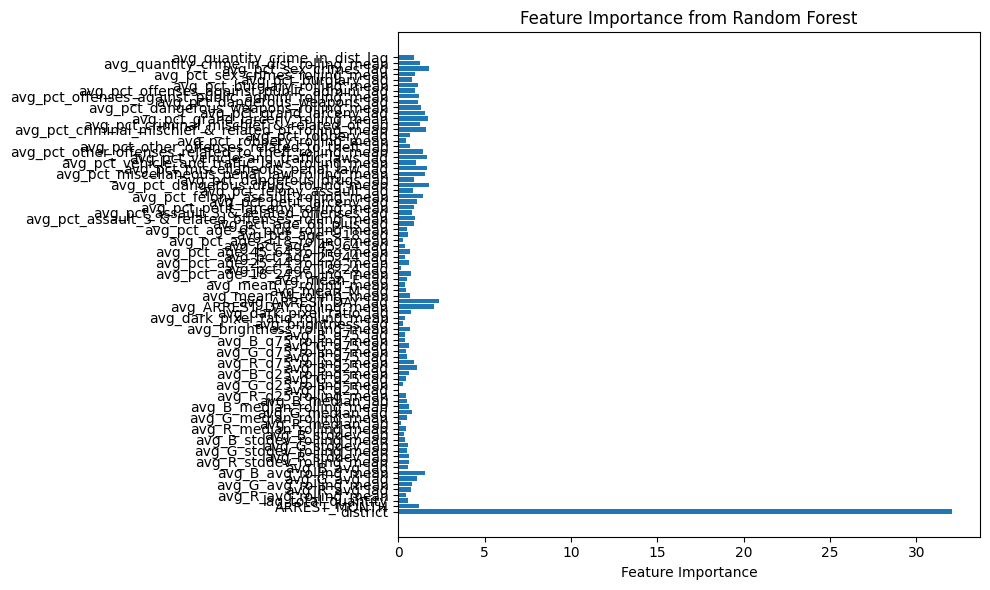

In [32]:
importances = pipe_cat.named_steps["model"].get_feature_importance()


features = X.columns


plt.figure(figsize=(10, 6))

plt.barh(features, importances)

plt.xlabel("Feature Importance")

plt.title("Feature Importance from Random Forest")

plt.tight_layout()

plt.show()

In [ ]:
agr = nyc.sort_values(by=["district" , "ARREST_MONTH"]).groupby(["district"])


In [ ]:
nyc_final["total_crime_rolling_sum"] = agr["total_quantity_crime_in_dist"].rolling(window=2, min_periods=1).sum().reset_index(drop=True)


In [ ]:
nyc_final["total_crime_rolling_std"] = agr["total_quantity_crime_in_dist"].rolling(window=2, min_periods=1).std().reset_index(drop=True)


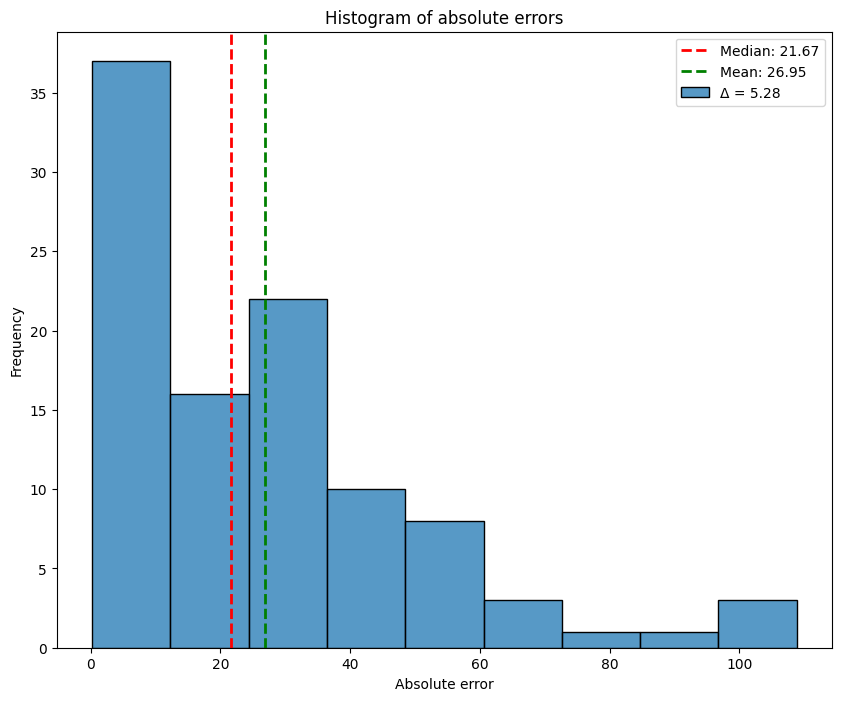

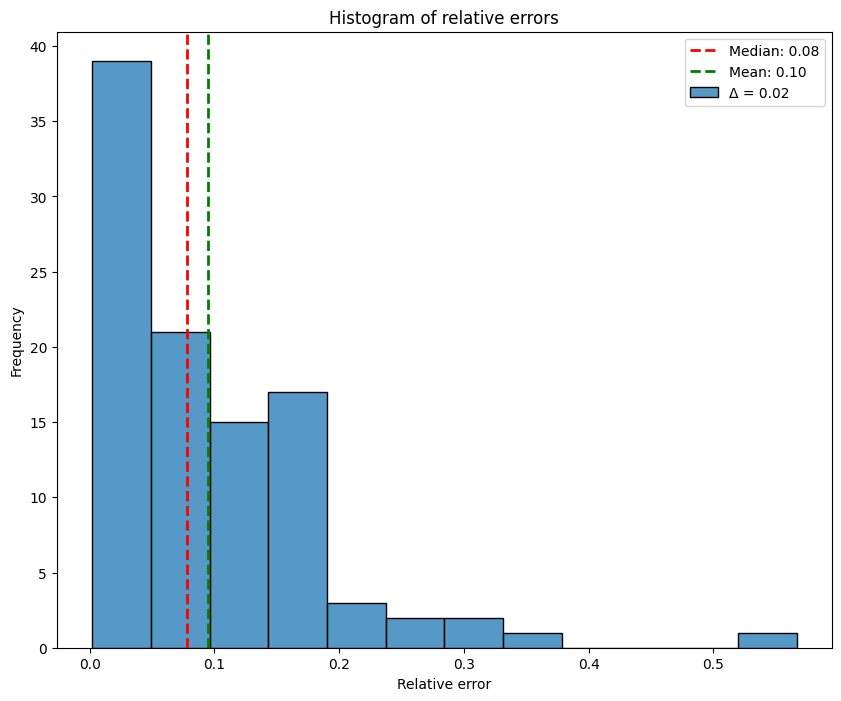

In [30]:
# counting the errors, relative and absolute ones.
abs_error = np.abs(y_test - y_pred)
rel_error = np.abs(y_test - y_pred) / y_test

# calculating means and medians of each type of errors.
med_abs = np.median(abs_error)
mean_abs = np.mean(abs_error)
med_rel = np.median(rel_error)
mean_rel = np.mean(rel_error)

# for absolute errors
plt.figure(figsize=(10, 8))
sns.histplot(abs_error)
distance = abs(med_abs - mean_abs) 

plt.axvline(med_abs, color='red', linestyle='dashed', linewidth=2, label=f'Медиана: {med_abs:.2f}')
plt.axvline(mean_abs, color='green', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_abs:.2f}')
  
plt.xlabel("Absolute error")
plt.ylabel("Frequency")
plt.title("Histogram of absolute errors")
plt.legend([f'Median: {med_abs:.2f}', f'Mean: {mean_abs:.2f}', f'Δ = {distance:.2f}'])
plt.show()

# for relative errors
plt.figure(figsize=(10, 8))
sns.histplot(rel_error)
distance = abs(med_rel - mean_rel) 

plt.axvline(med_rel, color='red', linestyle='dashed', linewidth=2, label=f'Median: {med_rel:.2f}')
plt.axvline(mean_rel, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rel:.2f}')

plt.xlabel("Relative error")
plt.ylabel("Frequency")
plt.title("Histogram of relative errors")
plt.legend([f'Median: {med_rel:.2f}', f'Mean: {mean_rel:.2f}', f'Δ = {distance:.2f}'])
plt.show()

In [26]:
from xgboost import XGBRegressor

cat_pipe = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_pipe = Pipeline([
    ("power", PowerTransformer())
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

pipe_xgb = Pipeline([
    ("preprocessing", preprocessor),
    ("model", XGBRegressor(
        objective='reg:squarederror',
        random_state=42
    ))
])

pipe_xgb.fit(X_train, y_train)

test_score = pipe_xgb.score(X_test, y_test)
print("XGBoost TEST R^2 score:", test_score)

scores_xgb = cross_val_score(pipe_xgb, X_train, y_train, cv=5, scoring='r2')
print("XGBoost CV R^2 score:", scores_xgb.mean())

ValueError: feature_names must be string, and may not contain [, ] or <

In [ ]:
y = nyc["District"]
X = nyc.drop(columns=["District"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)



cat_pipe = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


num_pipe = Pipeline([
    ("power", PowerTransformer())
])


preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


pipe_xgb = Pipeline([
    ("preprocessing", preprocessor),
    ("model", XGBClassifier(eval_metric='logloss', random_state=42))
])


pipe_xgb.fit(X_train, y_train)
test_accuracy = pipe_xgb.score(X_test, y_test)
print("XGBoost TEST accuracy:", test_accuracy)

scores_xgb = cross_val_score(pipe_xgb, X_train, y_train, cv=5, scoring='accuracy')

print("XGBoost CV-Accuracy: ", scores_xgb.mean())

NameError: name 'nyc' is not defined

In [ ]:
def create_model(trial):
    # Hyperparameter search space for XGBClassifier
    param_grid = {
        "model__n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "model__max_depth": trial.suggest_int("max_depth", 3, 10),
        "model__learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "model__subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "model__colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "model__gamma": trial.suggest_float("gamma", 0.0, 1.0)
    }
    
    # Create the pipeline with the preprocessor and model
    pipe_xgb = Pipeline([
        ("preprocessing", preprocessor),
        ("model", XGBClassifier(eval_metric='logloss', random_state=42))
    ])
    
    # Apply the hyperparameter search to the model
    pipe_xgb.set_params(**param_grid)
    
    return pipe_xgb


In [ ]:
# Define the objective function for Optuna optimization
def objective(trial):
    # Create the model with hyperparameters suggested by Optuna
    model = create_model(trial)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return f1

# Create the Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Output the best parameters and the best score
print("Best parameters found: ", study.best_params)
print("F1score: ", study.best_value)

[I 2025-03-26 17:57:50,077] A new study created in memory with name: no-name-60c3b222-e7be-483c-9a09-31f952ca30d4
[I 2025-03-26 17:57:50,384] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.07150678059543027, 'subsample': 0.866685996367043, 'colsample_bytree': 0.5253996433447903, 'gamma': 0.49523157339375923}. Best is trial 0 with value: 1.0.
[I 2025-03-26 17:57:50,612] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.0854005341649674, 'subsample': 0.9246349499826154, 'colsample_bytree': 0.7608015600152358, 'gamma': 0.9731031522879514}. Best is trial 0 with value: 1.0.
[I 2025-03-26 17:57:50,818] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.08753383714680775, 'subsample': 0.954193951471947, 'colsample_bytree': 0.516623777339163, 'gamma': 0.8737289894885216}. Best is trial 0 with value: 1.0.
[I 2025-03-26 17:57:51

Best parameters found:  {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.07150678059543027, 'subsample': 0.866685996367043, 'colsample_bytree': 0.5253996433447903, 'gamma': 0.49523157339375923}
Best accuracy score:  1.0


In [ ]:
X_train

,Patient ID,Age,Gender,Education Level,Marital Statuts,Occupation,Income Level,Live Area,Disease Duration,Hospitalizations,Family History,Substance Use,Suicide Attempt,Positive Symptom Score,Negative Symptom Score,GAF Score,Social Support,Stress Factors,Medication Adherence
9254,9255,67,1,5,3,0,2,1,33,1,1,0,1,58,94,21,0,1,0
1561,1562,18,1,5,2,1,1,0,0,0,0,1,0,33,4,77,2,1,2
1670,1671,64,0,1,0,0,0,1,0,0,1,0,0,29,25,61,2,0,0
6087,6088,23,1,2,1,2,1,0,0,0,0,1,0,27,39,61,2,2,2
6669,6670,76,1,2,2,2,0,0,0,0,1,0,0,3,2,91,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,74,1,1,0,1,2,0,0,0,0,0,0,11,47,89,2,2,1
5191,5192,37,0,1,0,1,1,0,37,4,0,1,1,69,97,47,0,0,2
5390,5391,19,0,2,0,2,0,0,0,0,0,1,0,37,36,95,2,0,0
860,861,73,1,1,3,0,2,0,7,2,1,0,0,97,55,18,2,1,1


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['Age', 'Negative Symptom Score',
                                  'Hospitalizations', 'GAF Score',
                                  'Disease Duration',
                                  'Positive Symptom Score']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'Education Level',
                                  'Marital Statuts', 'Live Area',
                                  'Family History', 'Substance Use',
                                  'Suicide Attempt', 'Social Support',
                                  'Stress Factors', 'Medication Adherence',
                                  'Income Level', 'Occupation'])])

In [ ]:

num_pipe = Pipeline([
    ("power", PowerTransformer())
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols)
], remainder='passthrough') # Use remainder='passthrough' to keep the columns not specified in the ColumnTransformer

In [ ]:
y = df["Diagnosis"]
X = df.drop(columns=["Diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


pipe_cbt = Pipeline([
    ("preprocessing", preprocessor),
    ("model", CatBoostClassifier(eval_metric='Logloss', cat_features=["passthrough__"+col for col in cat_cols], random_state=42))
])

pipe_cbt.fit(X_train, y_train)
y_pred = pipe_cbt.predict(X_test)
print(classification_report(y_test, y_pred))
scores_cat = cross_val_score(pipe_cbt, X_train, y_train, cv=5, scoring='accuracy')
print("CatBoost CV-Accuracy:", scores_cat.mean(
    
))

Learning rate set to 0.025035
0:	learn: 0.6257471	total: 2.9ms	remaining: 2.9s
1:	learn: 0.5560055	total: 5.72ms	remaining: 2.85s
2:	learn: 0.4915275	total: 8.5ms	remaining: 2.82s
3:	learn: 0.4318832	total: 12.1ms	remaining: 3.01s
4:	learn: 0.3813599	total: 14.9ms	remaining: 2.97s
5:	learn: 0.3372303	total: 17.8ms	remaining: 2.95s
6:	learn: 0.2940133	total: 20.4ms	remaining: 2.89s
7:	learn: 0.2571438	total: 23.1ms	remaining: 2.86s
8:	learn: 0.2270502	total: 25.8ms	remaining: 2.84s
9:	learn: 0.2022285	total: 28.4ms	remaining: 2.81s
10:	learn: 0.1786301	total: 31ms	remaining: 2.79s
11:	learn: 0.1572571	total: 33.3ms	remaining: 2.74s
12:	learn: 0.1390507	total: 35.8ms	remaining: 2.72s
13:	learn: 0.1231077	total: 38.4ms	remaining: 2.71s
14:	learn: 0.1074897	total: 40.6ms	remaining: 2.67s
15:	learn: 0.0953626	total: 43.2ms	remaining: 2.66s
16:	learn: 0.0860017	total: 46ms	remaining: 2.66s
17:	learn: 0.0776010	total: 48.7ms	remaining: 2.66s
18:	learn: 0.0694886	total: 51.5ms	remaining: 2.66s

In [ ]:
X_train

,Patient ID,Age,Gender,Education Level,Marital Statuts,Occupation,Income Level,Live Area,Disease Duration,Hospitalizations,Family History,Substance Use,Suicide Attempt,Positive Symptom Score,Negative Symptom Score,GAF Score,Social Support,Stress Factors,Medication Adherence
9254,9255,67,1,5,3,0,2,1,33,1,1,0,1,58,94,21,0,1,0
1561,1562,18,1,5,2,1,1,0,0,0,0,1,0,33,4,77,2,1,2
1670,1671,64,0,1,0,0,0,1,0,0,1,0,0,29,25,61,2,0,0
6087,6088,23,1,2,1,2,1,0,0,0,0,1,0,27,39,61,2,2,2
6669,6670,76,1,2,2,2,0,0,0,0,1,0,0,3,2,91,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,74,1,1,0,1,2,0,0,0,0,0,0,11,47,89,2,2,1
5191,5192,37,0,1,0,1,1,0,37,4,0,1,1,69,97,47,0,0,2
5390,5391,19,0,2,0,2,0,0,0,0,0,1,0,37,36,95,2,0,0
860,861,73,1,1,3,0,2,0,7,2,1,0,0,97,55,18,2,1,1


In [ ]:
mlflow.set_experiment("Schizophrenia_Classification")

2025/03/28 20:48:18 INFO mlflow.tracking.fluent: Experiment with name 'Schizophrenia_Classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='/home/evharthman/ml_practice/mlruns/684682762218537200', creation_time=1743194898894, experiment_id='684682762218537200', last_update_time=1743194898894, lifecycle_stage='active', name='Schizophrenia_Classification', tags={}>

In [ ]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[9.99926292e-01, 7.37081967e-05],
       [3.48205635e-04, 9.99651794e-01],
       [9.99939103e-01, 6.08965276e-05],
       ...,
       [9.99943778e-01, 5.62223740e-05],
       [9.99924453e-01, 7.55468682e-05],
       [9.99950928e-01, 4.90720602e-05]])

In [ ]:
def mlflow_run(best_pipeline, best_params, X_test, y_test):
    mlflow.log_params(best_params)
    # 7. Predict on the test set
    y_pred = best_pipeline.predict(X_test)
    y_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probability for positive class

    # 8. Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)
    print("Confusion Matrix:\n", cm)

    # 9. Log metrics, params, and model to MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc_auc)

    
    mlflow.log_text(f"Confusion Matrix:\n{cm}", "confusion_matrix.txt")

    # Log the final model
    mlflow.sklearn.log_model(best_pipeline, "model_pipeline")


    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # 2. Create a matplotlib figure
    plt.figure(figsize=(30, 20))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    mlflow.log_figure(plt.gcf(), "roc_curve.png")
    plt.close()
    
    
    #overall confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    mlflow.log_figure(plt.gcf(), "confusion_matrix.png")
    plt.close()

    #confusion matrix per mno

    
    

    importances = best_pipeline.named_steps['model'].feature_importances_
    
    # If X_train is a DataFrame, we can use its column names
    feature_names = best_pipeline.named_steps['preprocessing'].get_feature_names_out()
    
    # Create a DataFrame of feature names and their importances
    feat_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    feat_imp_df = feat_imp_df[feat_imp_df['importance'] > 0].head(40)


    total_importance = feat_imp_df['importance'].sum()
    feat_imp_df['importance_fraction'] = feat_imp_df['importance'] / total_importance
    
    # 2. Create a horizontal bar chart
    fig, ax = plt.subplots(figsize=(25, 25))
    bars = ax.barh(feat_imp_df['feature'], feat_imp_df['importance_fraction'], color='skyblue')
    ax.invert_yaxis()  # so the highest importance is at the top
    
    ax.set_title("Feature Importances from XGBoost")
    ax.set_xlabel("Importance (%)")
    ax.set_ylabel("Features")
    # Format x-axis from 0..1 into 0..100%
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
    
    # 3. Annotate each bar with its numeric percentage
    for bar in bars:
        width = bar.get_width()  # This is the feature importance fraction
        label_text = f"{width:.1%}"  # Convert fraction to percent string, e.g. '12.3%'
        # We'll place the text just to the right of the bar, vertically centered
        ax.text(
            width + 0.01,                       # x-position
            bar.get_y() + bar.get_height() / 2, # y-position
            label_text,
            va='center'
        )
    
    # 3a. Log figure to MLflow (MLflow >= 1.22)
    mlflow.log_figure(plt.gcf(), "feature_importances.png")


    feat_imp_df.to_csv("feature_importances.csv", index=False)
    mlflow.log_artifact("feature_importances.csv")
    
    plt.close()
    

    print("\nRun finished. All results have been logged to MLflow.")

In [ ]:
X_train

,Patient ID,Age,Gender,Education Level,Marital Statuts,Occupation,Income Level,Live Area,Disease Duration,Hospitalizations,Family History,Substance Use,Suicide Attempt,Positive Symptom Score,Negative Symptom Score,GAF Score,Social Support,Stress Factors,Medication Adherence
9254,9255,67,1,5,3,0,2,1,33,1,1,0,1,58,94,21,0,1,0
1561,1562,18,1,5,2,1,1,0,0,0,0,1,0,33,4,77,2,1,2
1670,1671,64,0,1,0,0,0,1,0,0,1,0,0,29,25,61,2,0,0
6087,6088,23,1,2,1,2,1,0,0,0,0,1,0,27,39,61,2,2,2
6669,6670,76,1,2,2,2,0,0,0,0,1,0,0,3,2,91,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,74,1,1,0,1,2,0,0,0,0,0,0,11,47,89,2,2,1
5191,5192,37,0,1,0,1,1,0,37,4,0,1,1,69,97,47,0,0,2
5390,5391,19,0,2,0,2,0,0,0,0,0,1,0,37,36,95,2,0,0
860,861,73,1,1,3,0,2,0,7,2,1,0,0,97,55,18,2,1,1


In [ ]:
def create_pipeline_catboost(best_params, num_cols):
    num_pipe = Pipeline([
    ("power", PowerTransformer())
    ])

    preprocessor = ColumnTransformer([
        ("num", num_pipe, num_cols)
    ], remainder='passthrough') # Use remainder='passthrough' to keep the columns not specified in the ColumnTransformer

    pipe_cbt = Pipeline([
    ("preprocessing", preprocessor),
    ("model", CatBoostClassifier(**best_params))
    ])

    return pipe_cbt


In [ ]:

name = 'Catboost'
mlflow.set_experiment(name)  # Create or use existing experiment

with mlflow.start_run(run_name=f"{name}_experiment"):
    
    #cat_cols = []
    num_cols = X_train.columns.difference(cat_cols)


    # study = optuna.create_study(direction='maximize')
    # study.optimize(objective, n_trials=10, show_progress_bar=True)
    # best_params = study.best_params
    # print("Best hyperparameters:", best_params)
    # best_pipeline = create_pipeline_xgboost(**best_params)


    
    best_params = {
        'iterations': 1
        #,'task_type': "GPU"
        #,'devices': '0'
        ,'cat_features': ['remainder__' + col for col in cat_cols]
        ,'eval_metric': 'Logloss'
        ,'random_state': 42
    }
    
    best_pipeline = create_pipeline_catboost(best_params, num_cols)

    best_pipeline.fit(X_train, y_train)
    mlflow_run(best_pipeline, best_params, X_test, y_test)

Learning rate set to 0.5
0:	learn: 0.3255731	total: 5.95ms	remaining: 0us
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[1406    0]
 [   0  594]]


2025/04/03 20:14:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Run finished. All results have been logged to MLflow.
🏃 View run Catboost_experiment at: http://104.198.187.149:8000/#/experiments/1/runs/f5217a6f2040436b9181e970eeaba75d
🧪 View experiment at: http://104.198.187.149:8000/#/experiments/1


In [ ]:
def plots(df, col, pt):
    plt.figure(figsize=(8,5))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title('Before ' + str(pt).split('(')[0])

    plt.subplot(122)
    p1 = pt.fit_transform(df[[col]]).values.flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(pt).split('(')[0])


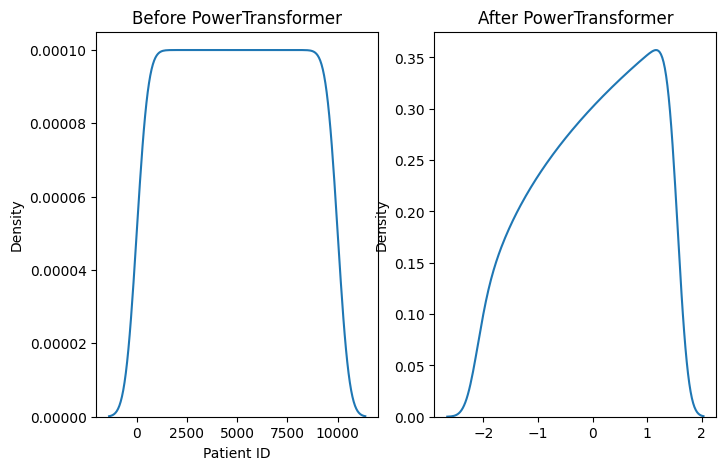

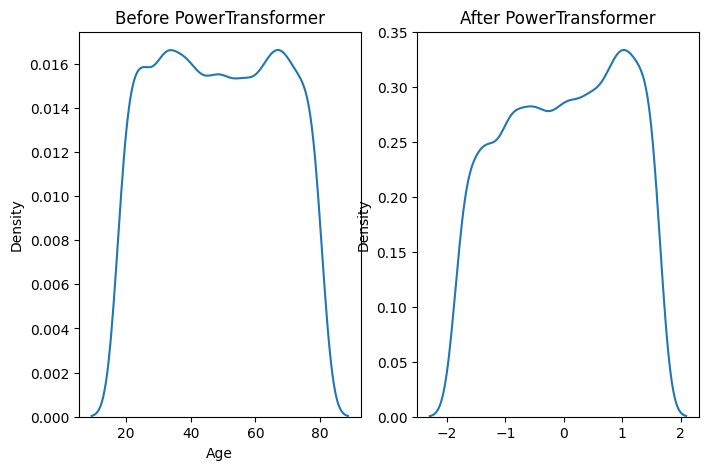

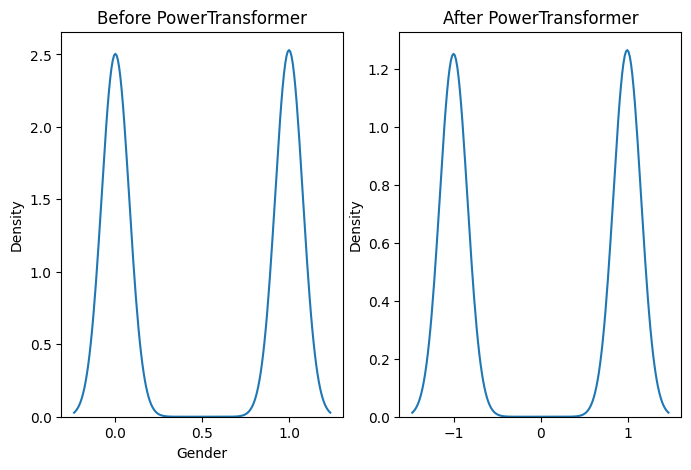

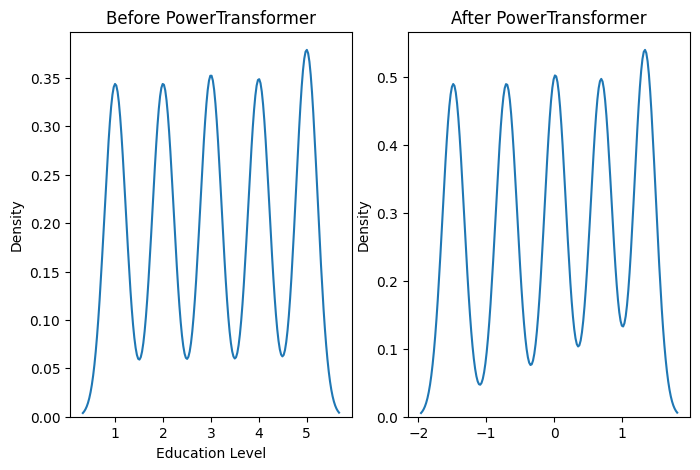

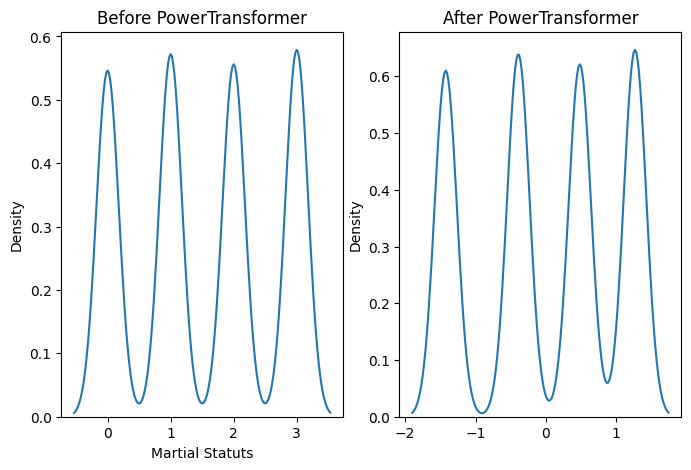

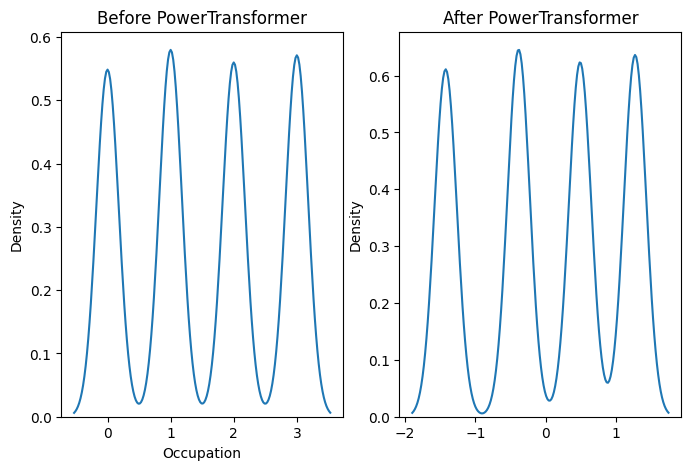

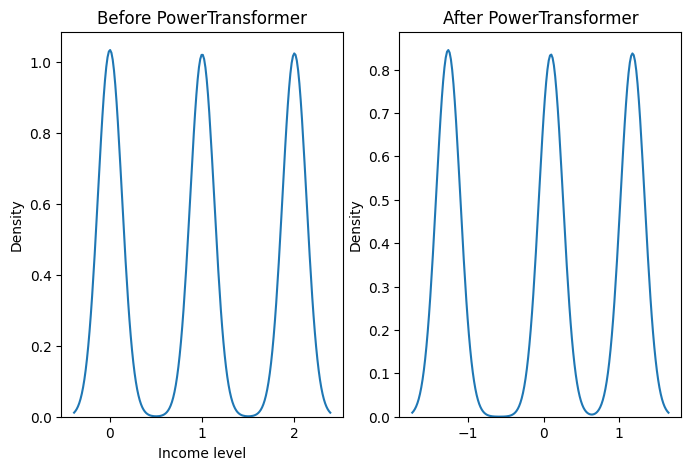

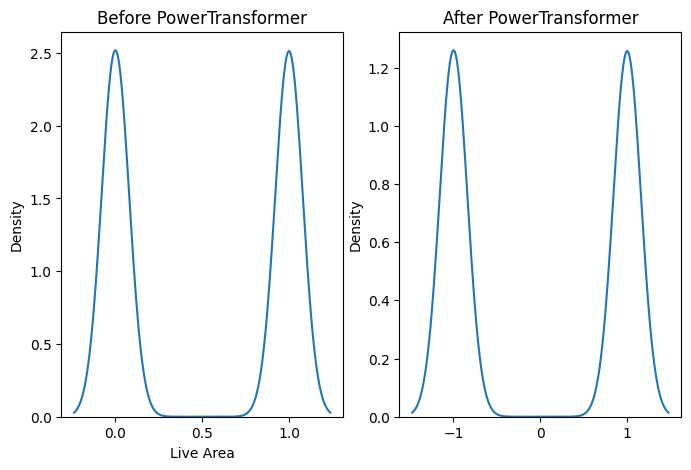

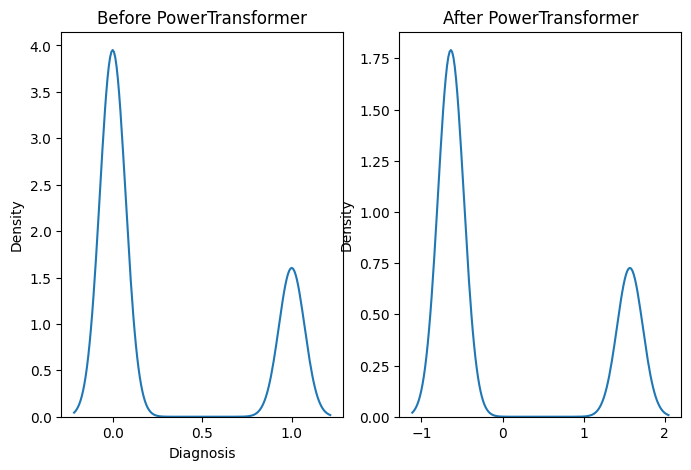

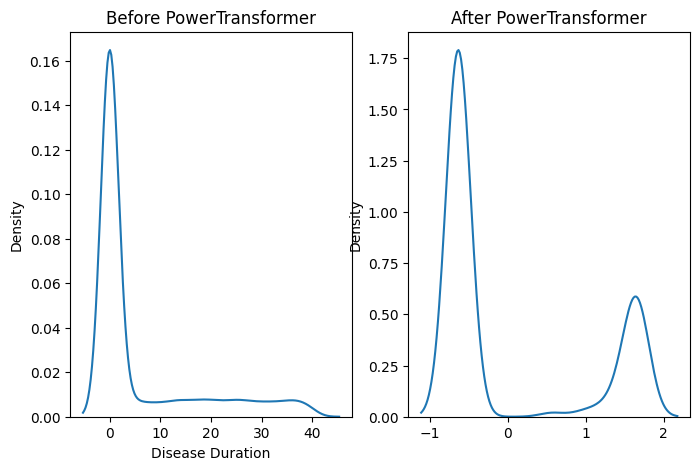

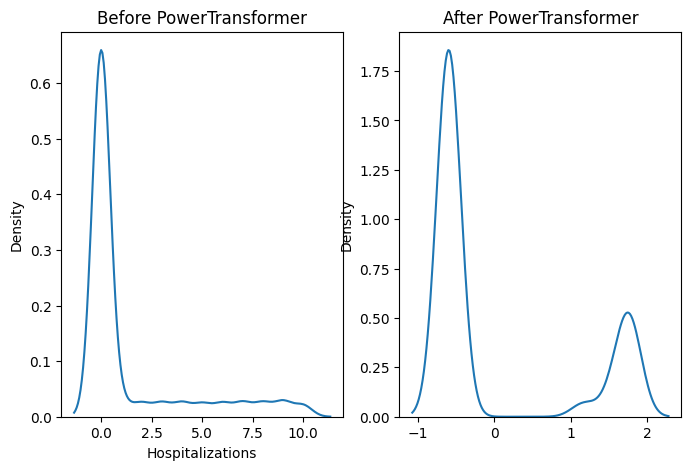

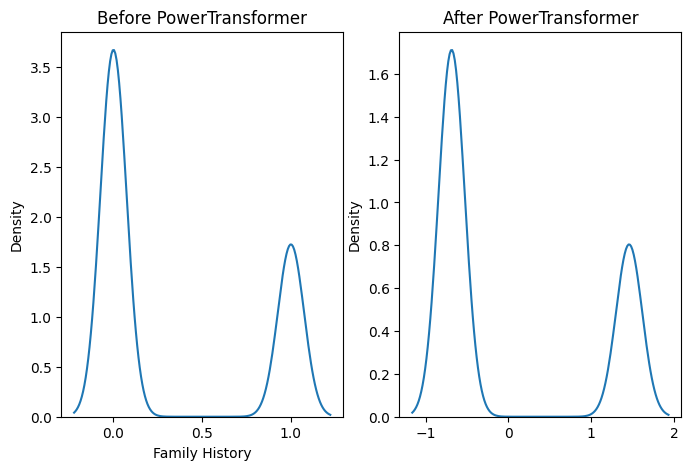

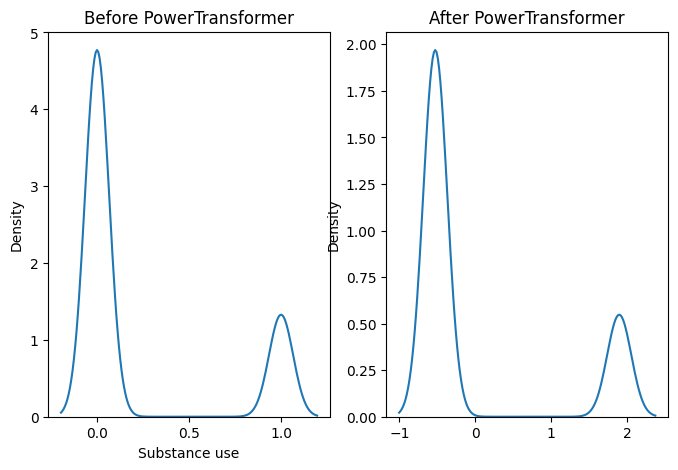

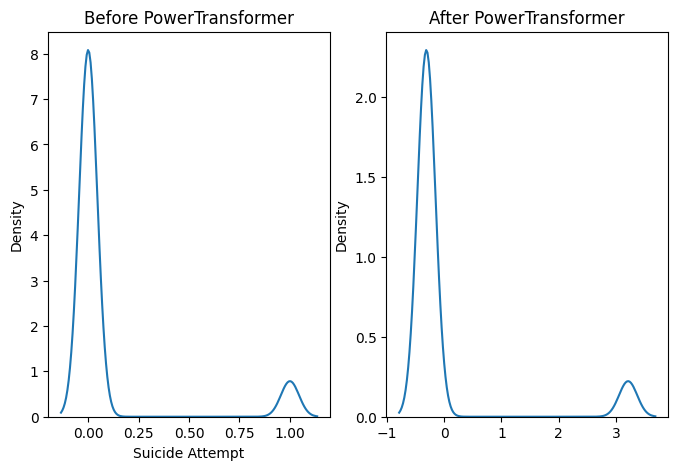

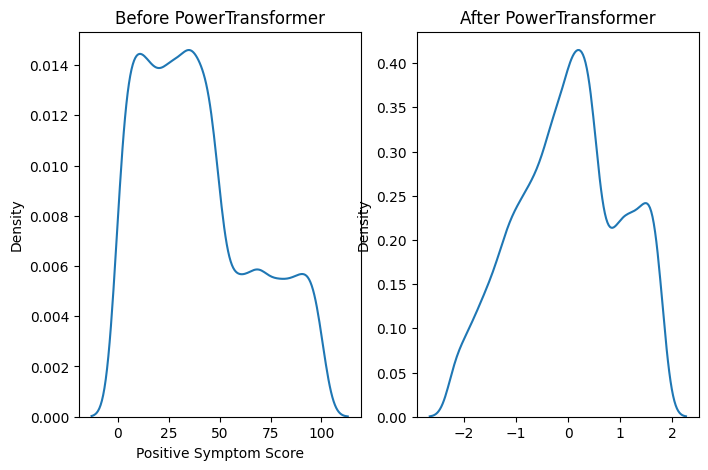

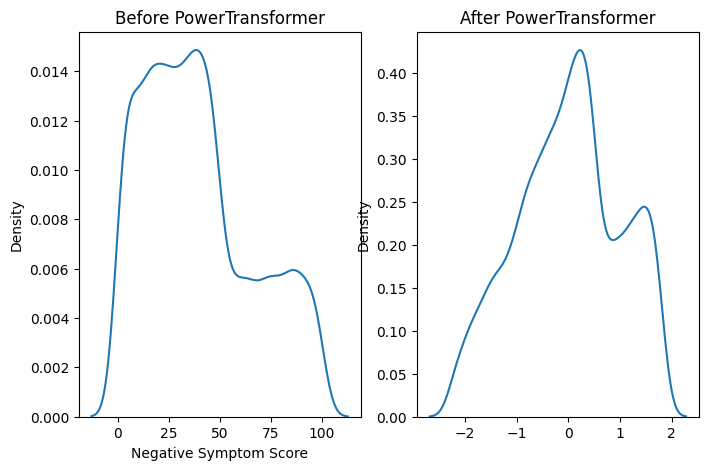

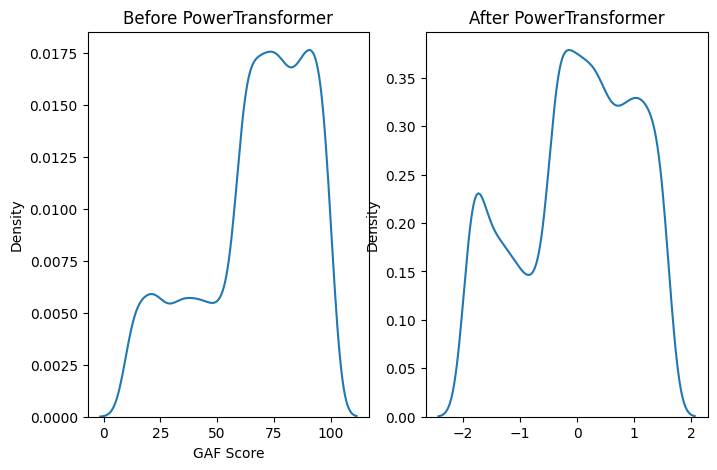

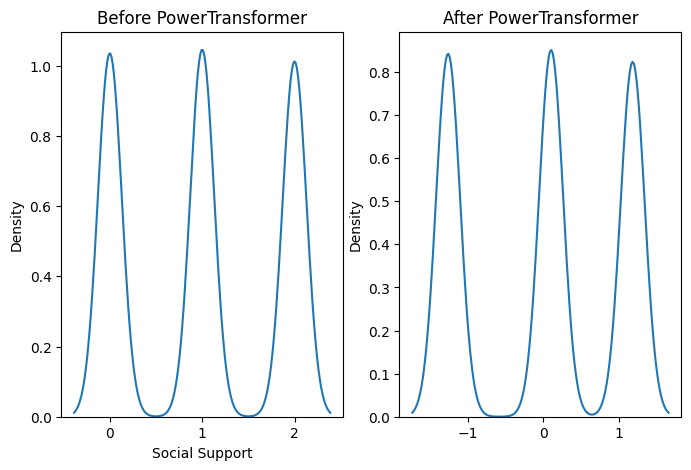

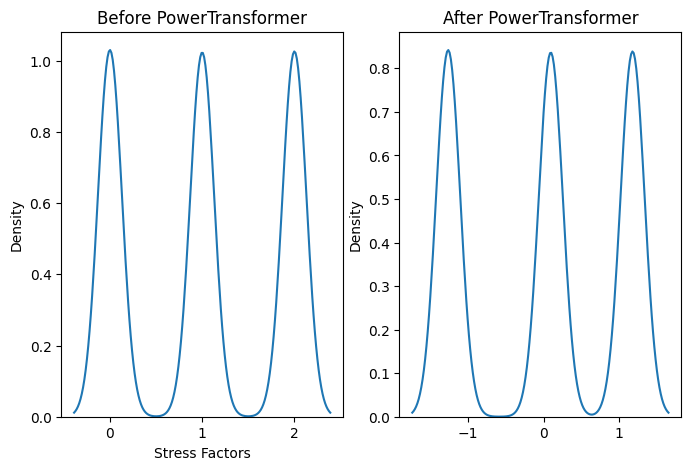

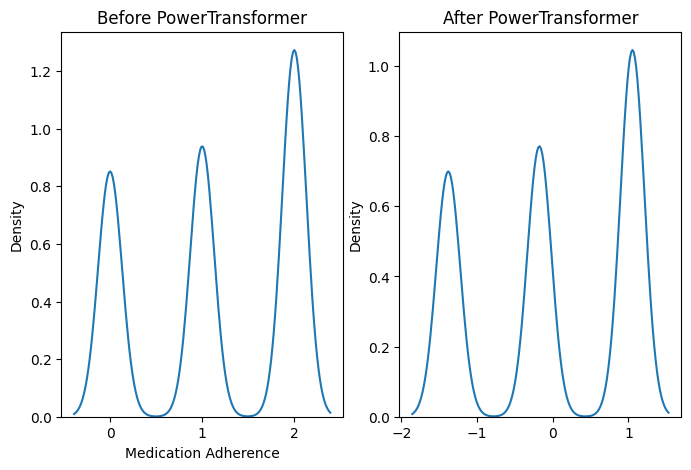

In [ ]:
for col in df.columns:
    plots(df, col, PowerTransformer(method='yeo-johnson'))

ValueError: The Box-Cox transformation can only be applied to strictly positive data

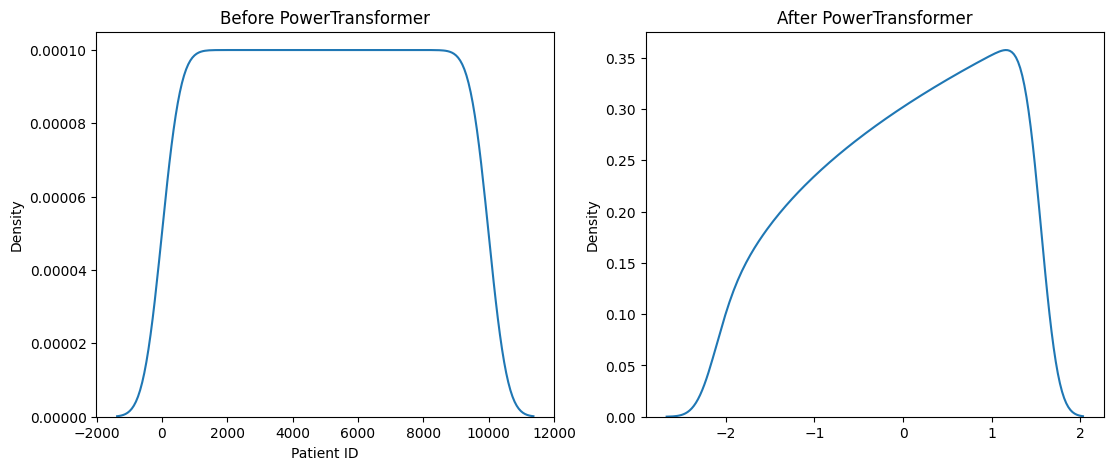

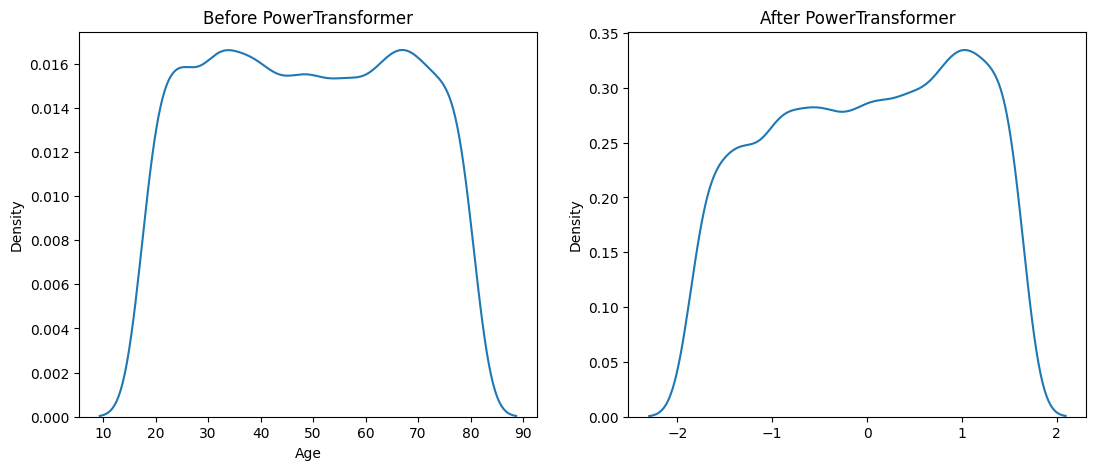

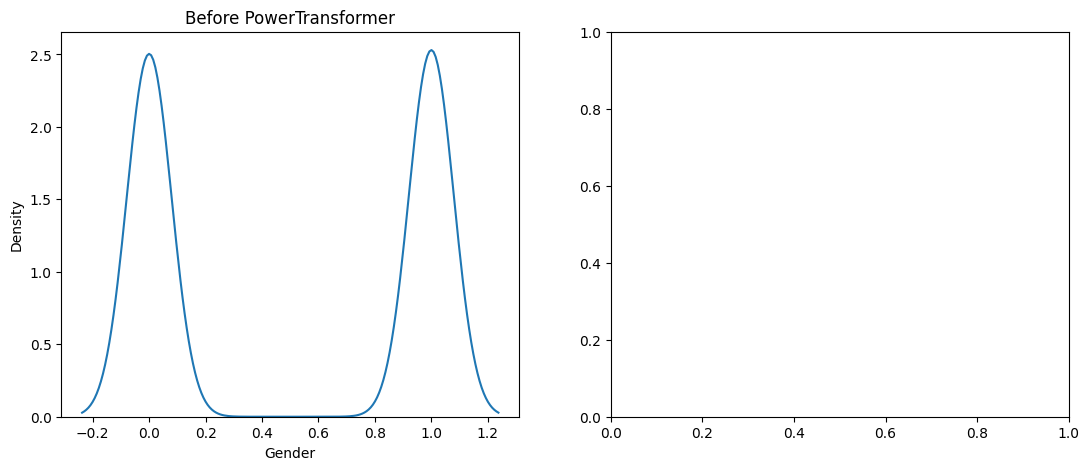